In [1]:
import torch
import seaborn as sns
from torch import distributions

from torch import nn, optim
import math
from tqdm import tqdm

from pyro import distributions as dist
from pyro.distributions import transforms as T
import matplotlib.pyplot as plt

In [2]:
DIM = 4

In [3]:
data = torch.load('data.pth')

In [4]:
base_dist = dist.Normal(torch.zeros(DIM), torch.ones(DIM))
transform = [T.block_autoregressive(DIM) for _ in range(1)]
composed_transform = T.ComposeTransformModule(transform)

transformed_dist = dist.TransformedDistribution(base_dist, composed_transform.inv)
optimizer = torch.optim.Adam(composed_transform.parameters(), lr=1e-3)


In [5]:
exp_transform = T.ExpTransform()
log_transform = T.ExpTransform().inv

logit_transform = T.SigmoidTransform().inv
sigmoid_transform = T.SigmoidTransform()


In [6]:
NX = 32
grid_m1 = torch.linspace(1e-9, 100, NX)
grid_q = torch.linspace(0.01, 1-0.01, NX)
grid_X = torch.linspace(-1, 1, NX)
grid_z = torch.linspace(0, 10, NX)

In [7]:
theta_samples = data[:, :DIM].clone()


grid_m1_ = log_transform(grid_m1)
theta_samples[:, 0] = log_transform(theta_samples[:, 0])

grid_q_ = logit_transform(grid_q)
theta_samples[:, 1] = logit_transform(theta_samples[:, 1])

grid_X_ = grid_X.clone()

grid_z_ = grid_z.clone()

In [8]:
grid = torch.stack(torch.meshgrid(grid_m1_, grid_q_, grid_X_, grid_z_, indexing='ij')).view(DIM, -1).T

In [9]:
theta_samples = theta_samples[:, None] + torch.randn(len(theta_samples), 1024, DIM) * 0.5

In [10]:
NUM_HIERARCHICAL_SAMPLES = 32

0 12.370269775390625


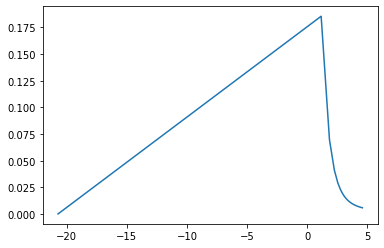

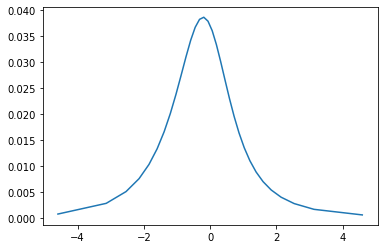

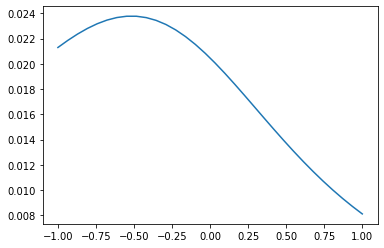

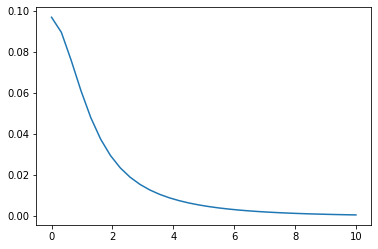

128 8.519572257995605


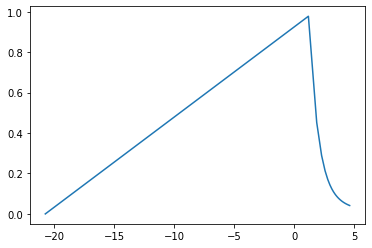

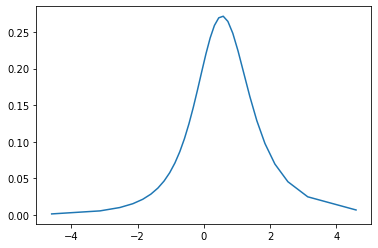

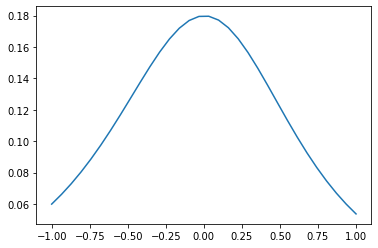

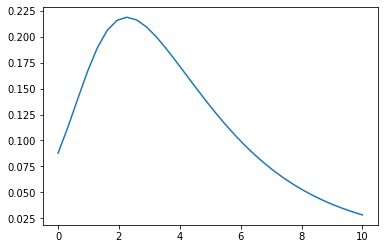

256 6.7051544189453125


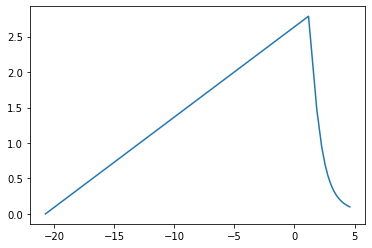

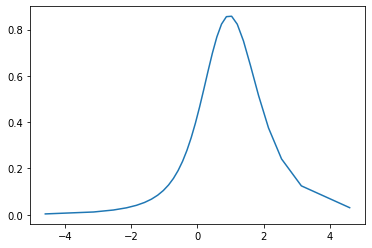

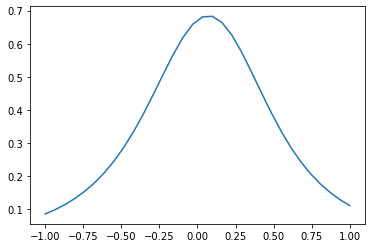

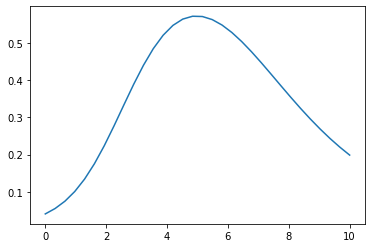

384 5.678610324859619


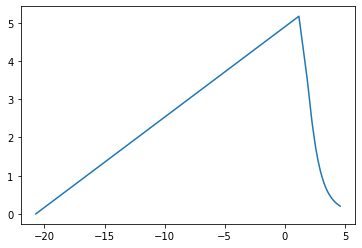

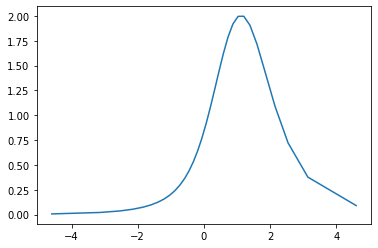

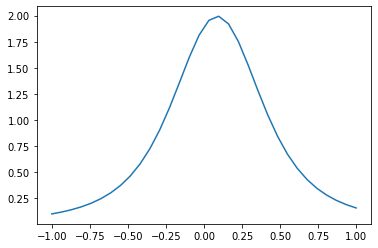

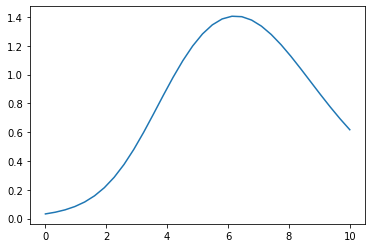

512 5.015625953674316


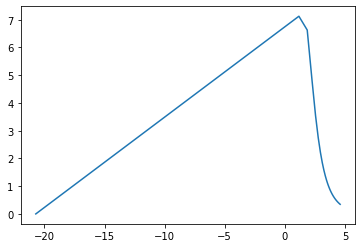

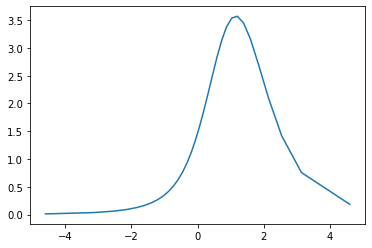

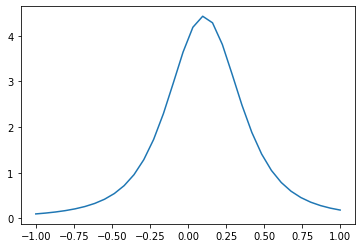

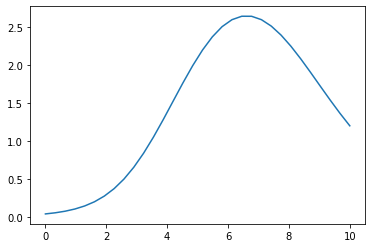

640 4.539923191070557


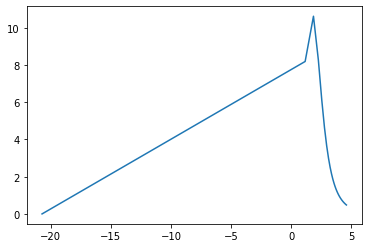

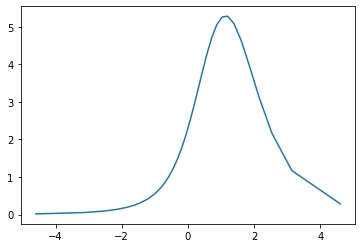

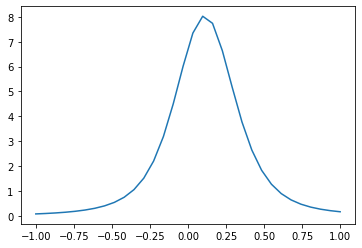

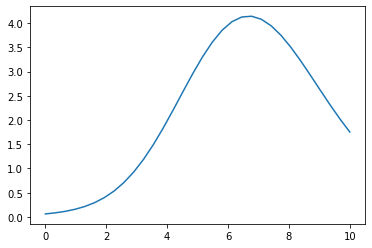

768 4.178612232208252


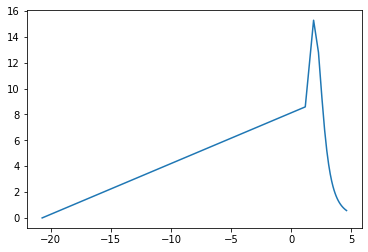

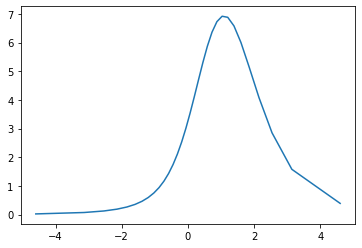

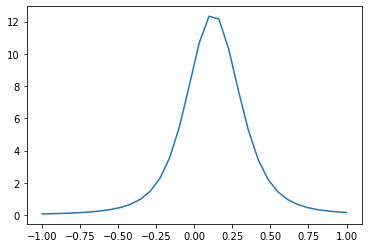

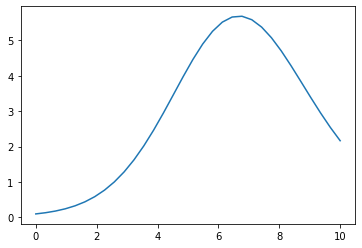

896 3.9173498153686523


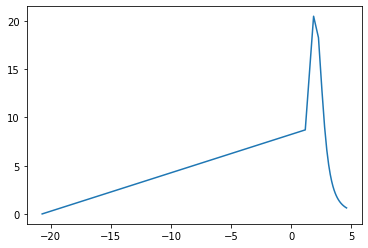

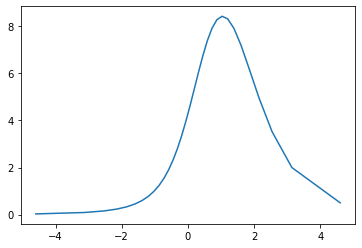

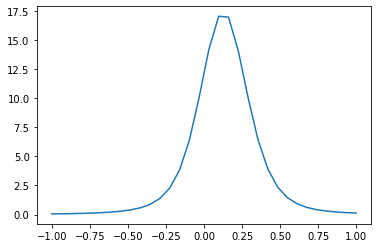

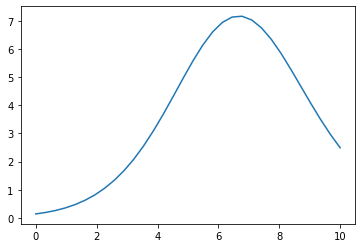

1024 3.687366485595703


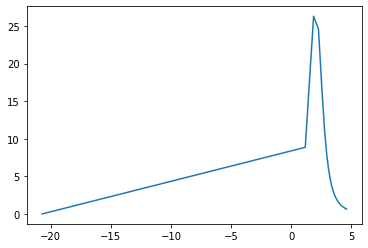

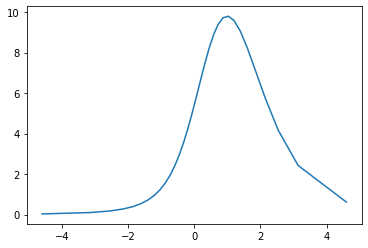

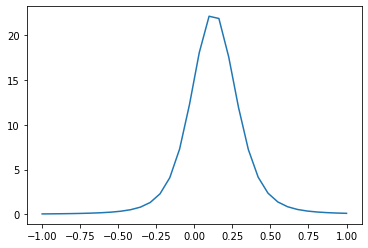

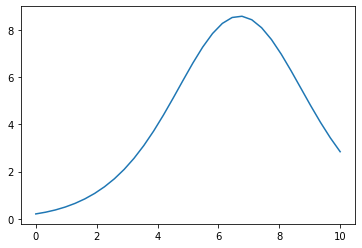

1152 3.489206314086914


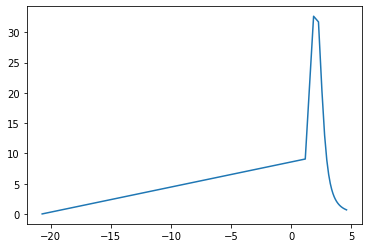

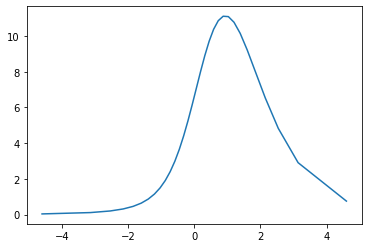

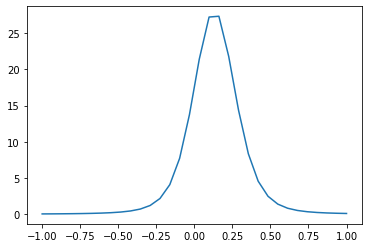

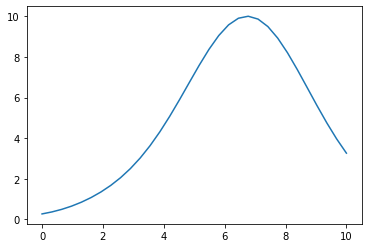

1280 3.3239333629608154


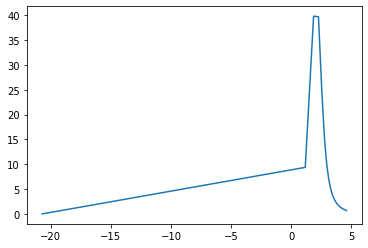

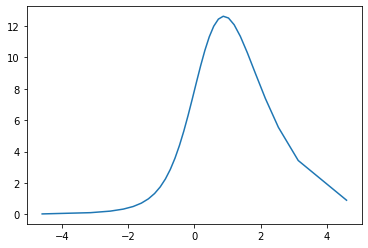

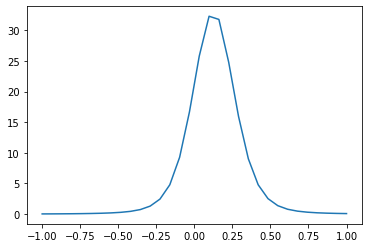

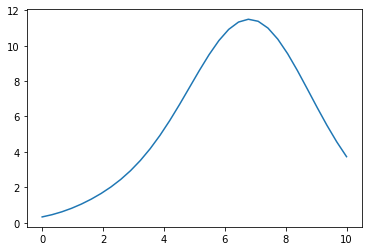

1408 3.1985998153686523


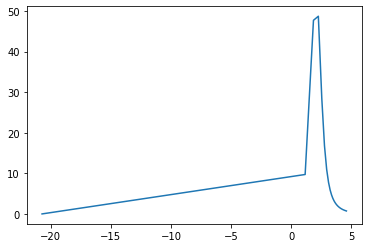

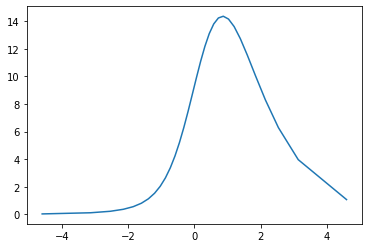

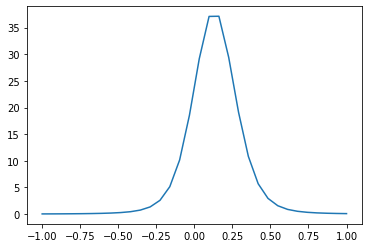

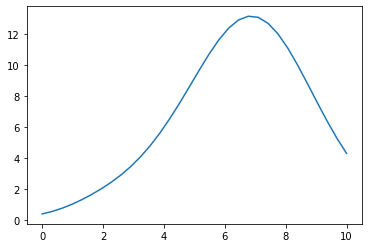

1536 3.0090889930725098


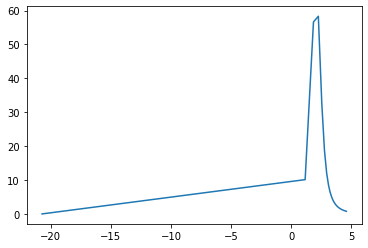

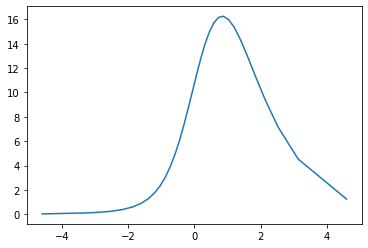

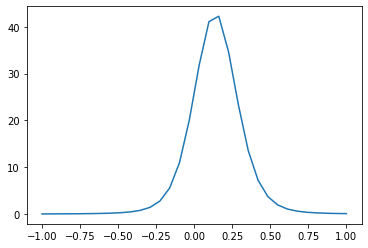

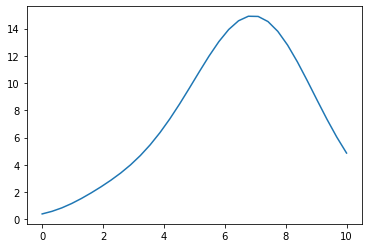

1664 2.880099296569824


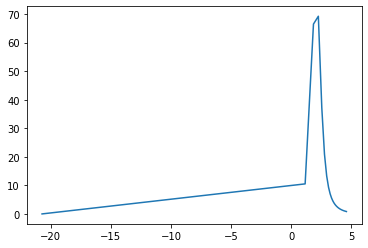

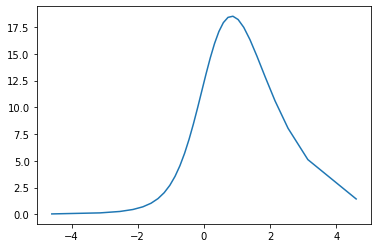

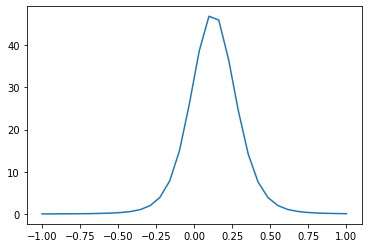

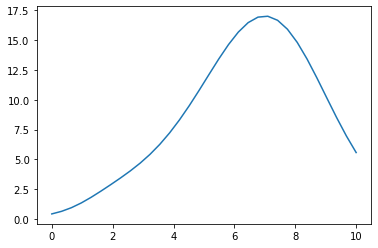

1792 2.725773811340332


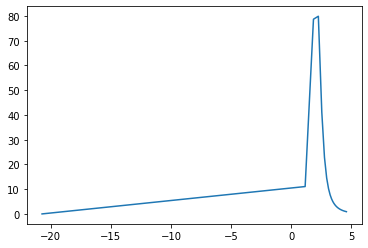

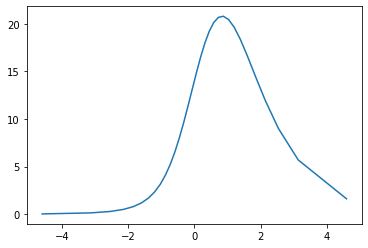

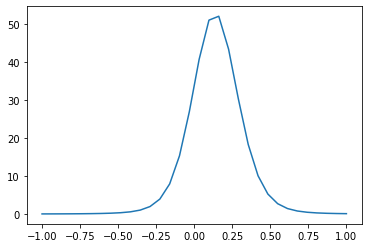

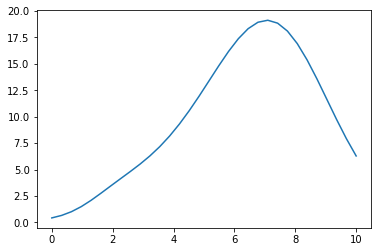

1920 2.603590965270996


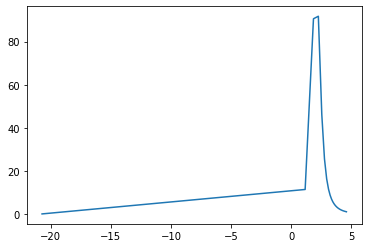

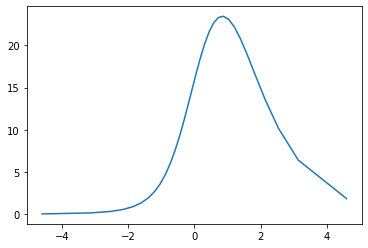

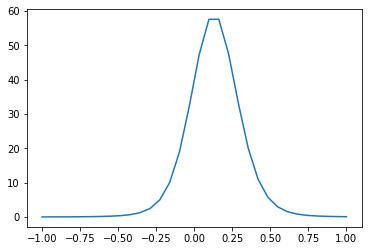

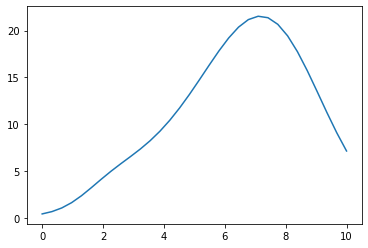

2048 2.489960193634033


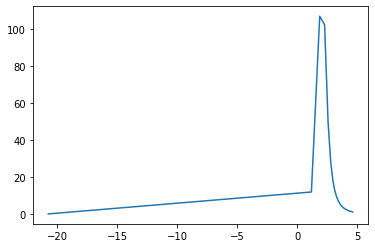

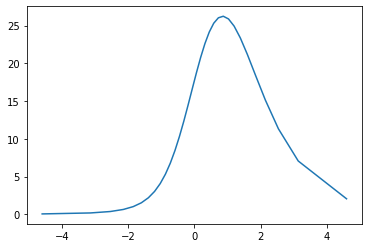

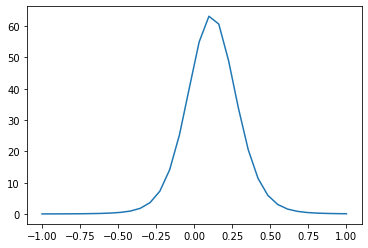

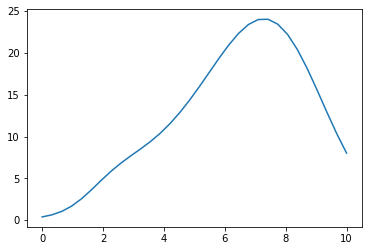

2176 2.3658604621887207


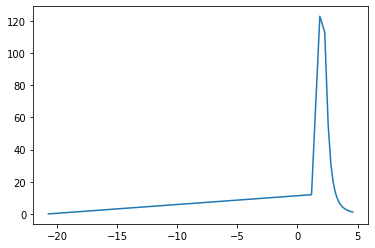

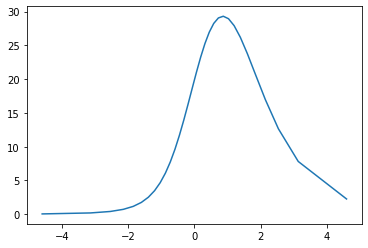

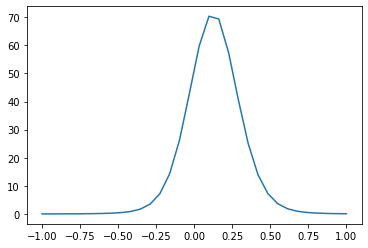

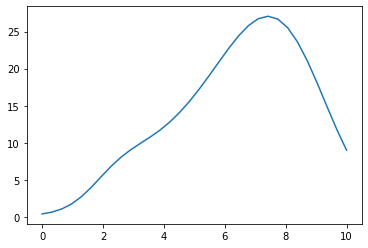

2304 2.2539281845092773


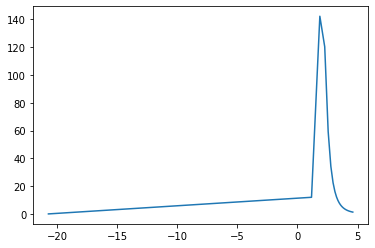

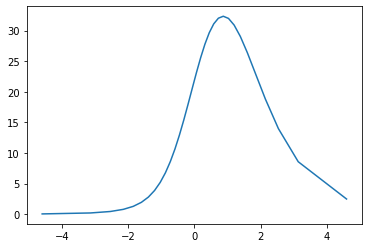

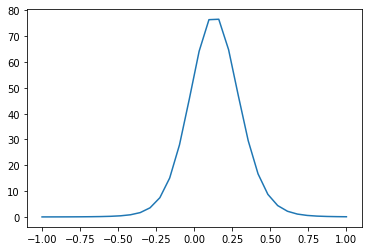

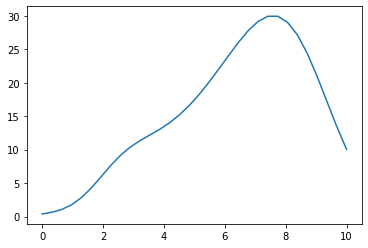

2432 2.176096200942993


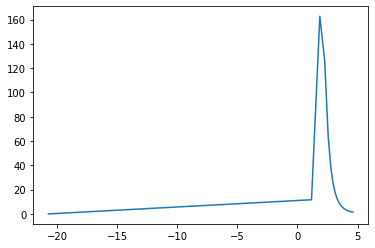

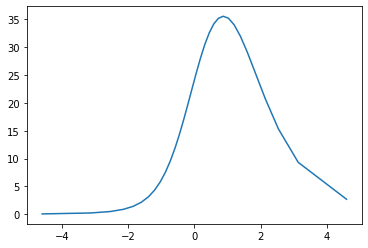

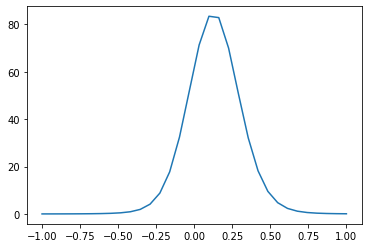

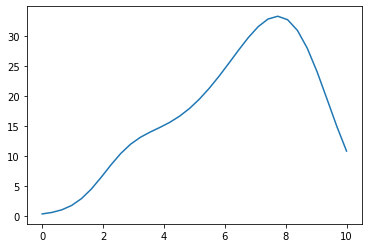

2560 2.073943614959717


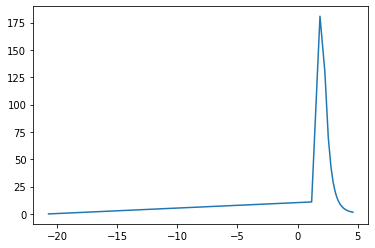

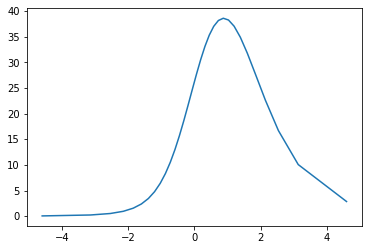

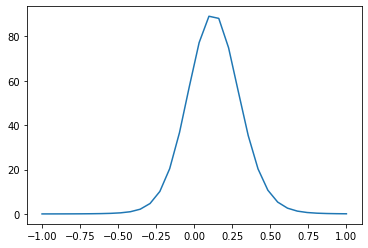

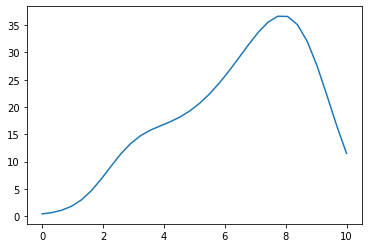

2688 2.0279593467712402


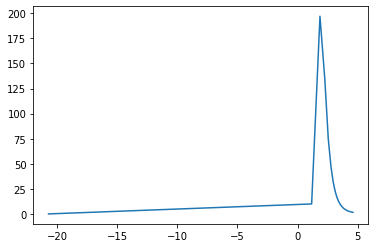

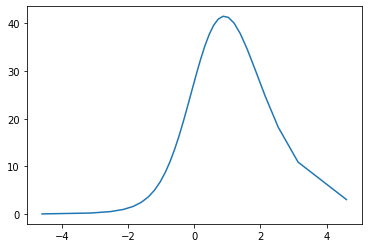

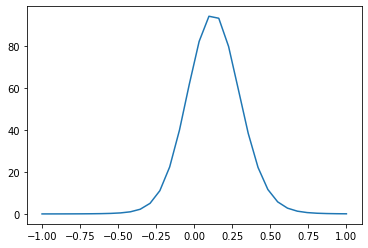

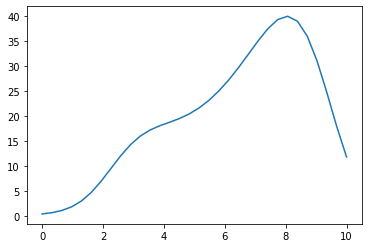

2816 1.9419292211532593


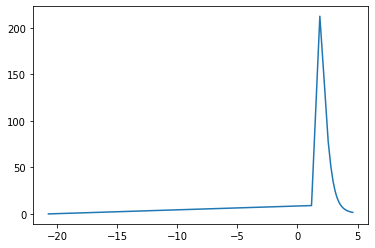

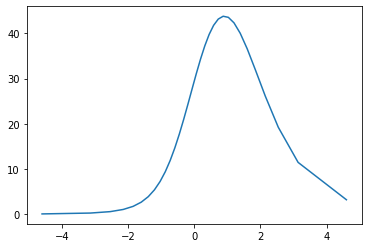

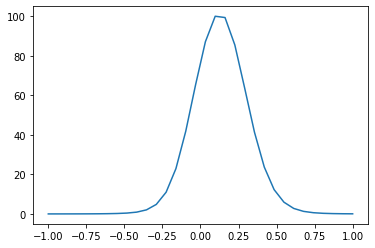

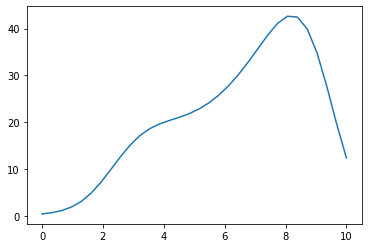

2944 1.926105260848999


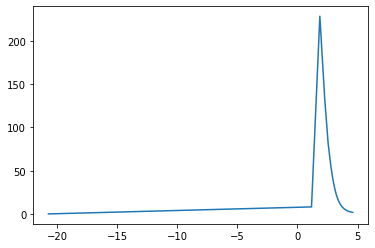

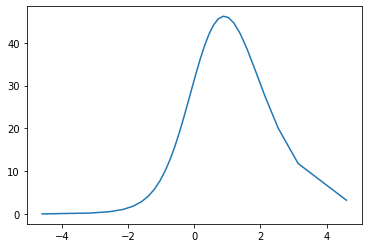

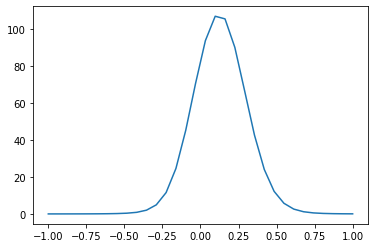

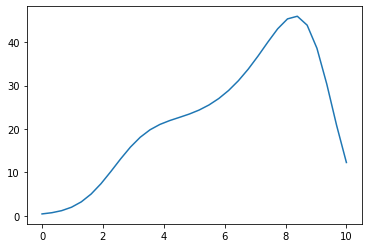

3072 1.8928831815719604


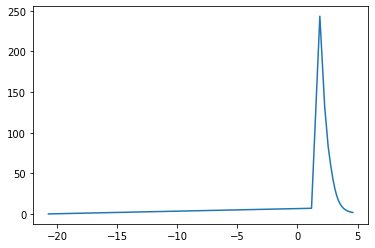

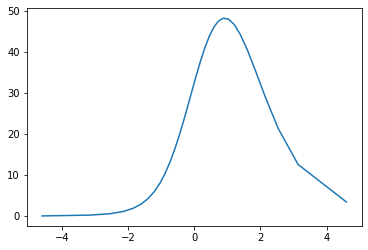

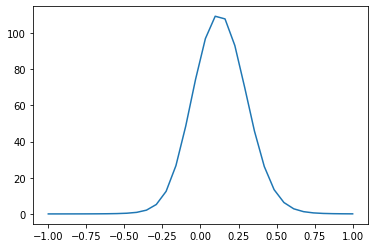

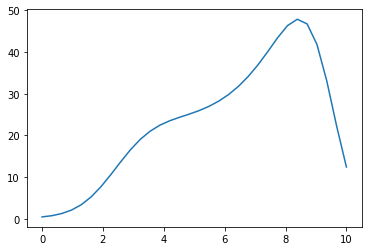

3200 1.8355426788330078


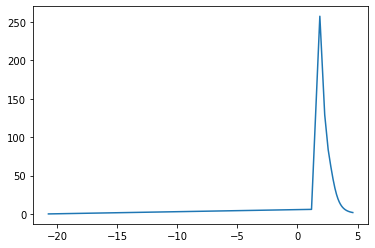

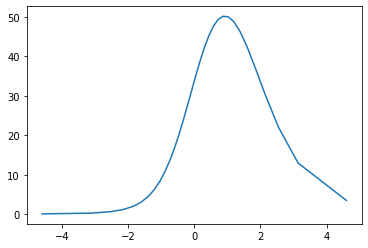

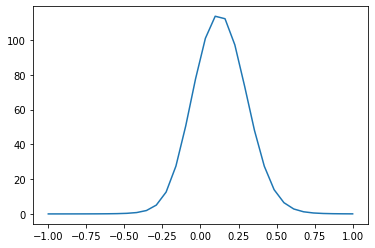

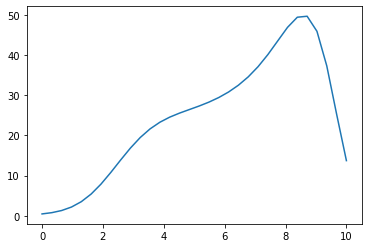

3328 1.8411599397659302


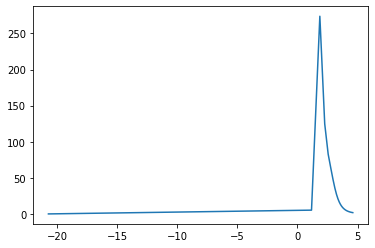

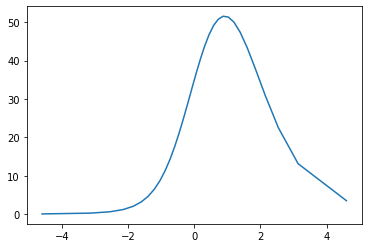

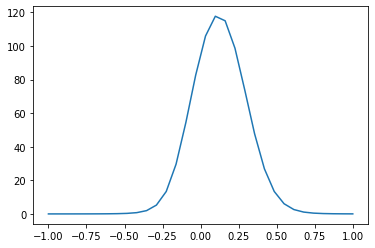

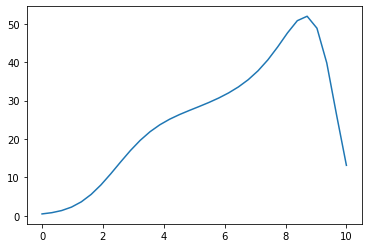

3456 1.8071364164352417


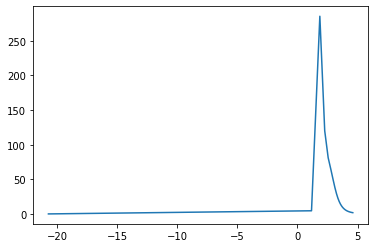

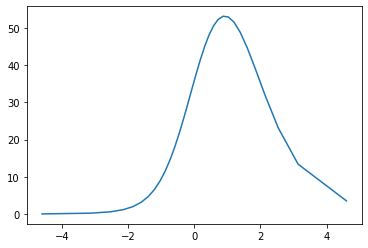

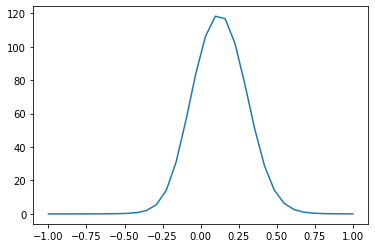

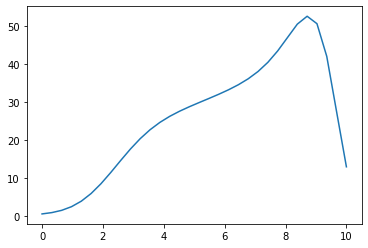

3584 1.7811685800552368


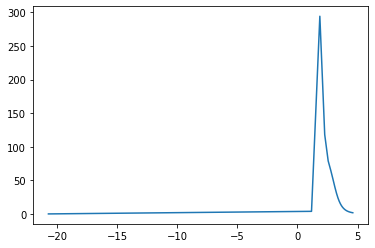

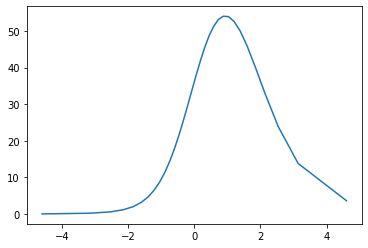

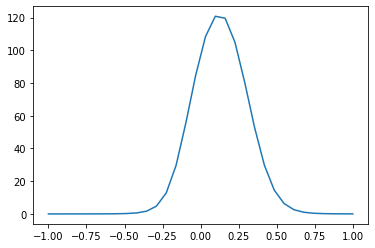

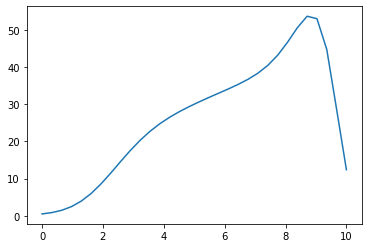

3712 1.7850168943405151


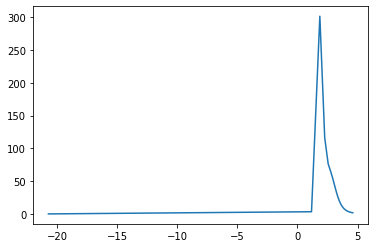

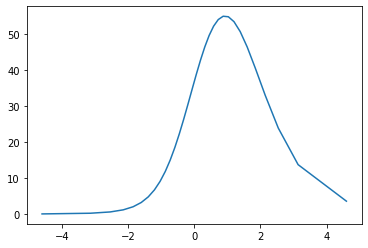

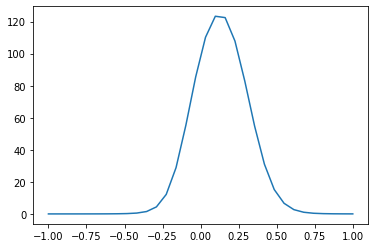

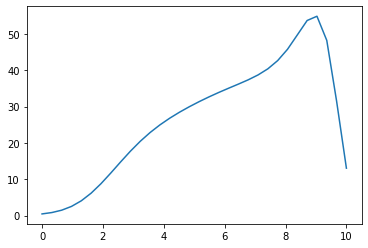

3840 1.7592849731445312


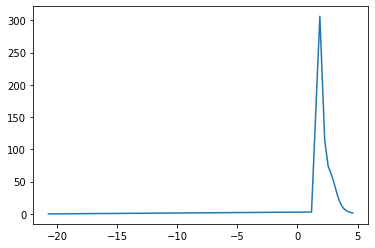

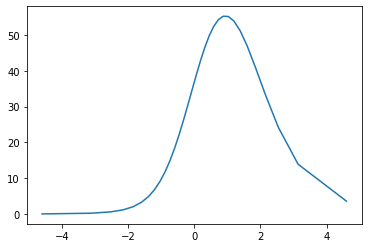

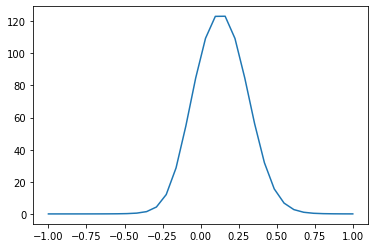

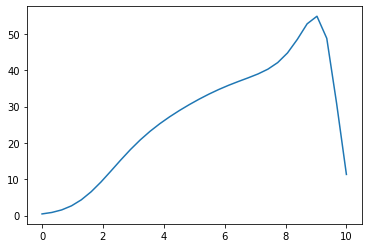

3968 1.742493748664856


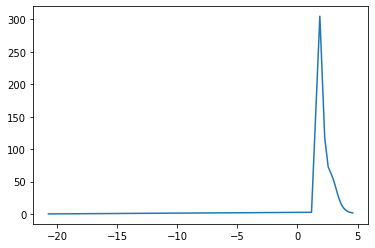

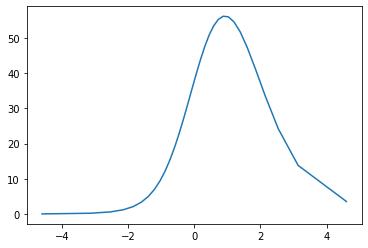

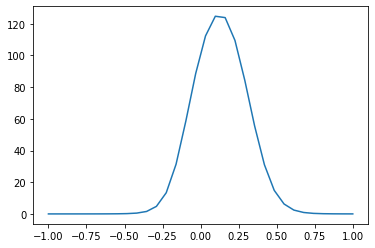

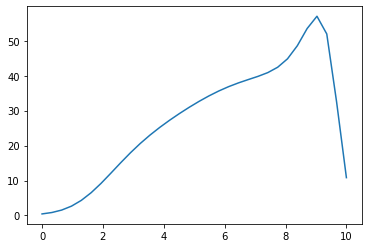

4096 1.7550320625305176


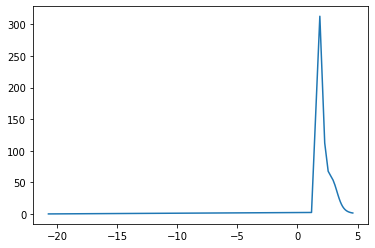

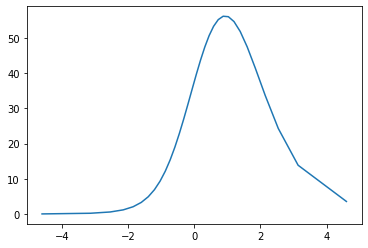

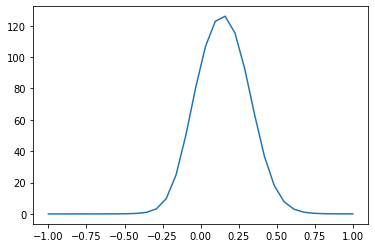

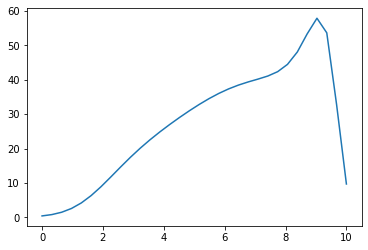

4224 1.7564141750335693


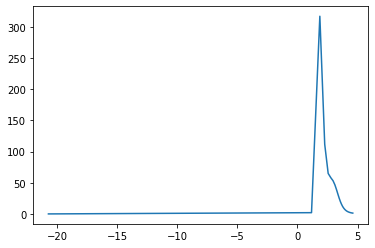

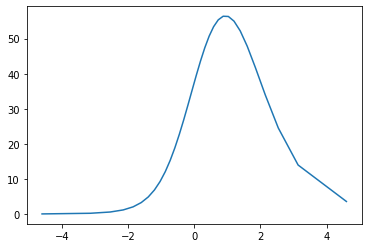

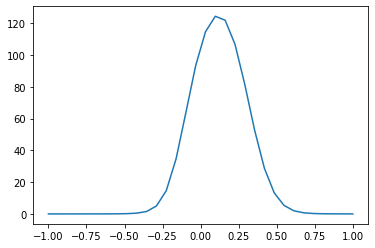

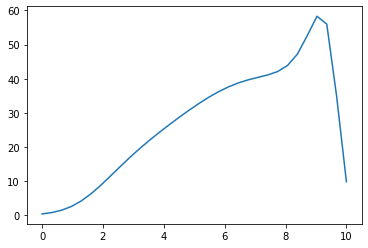

4352 1.7480716705322266


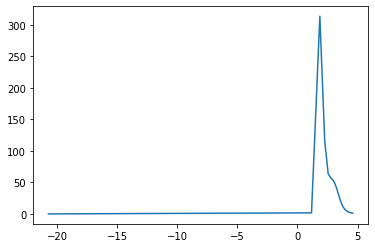

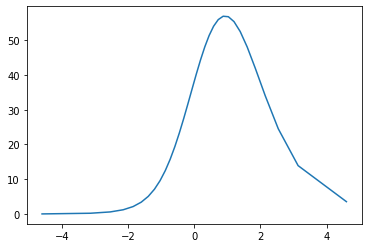

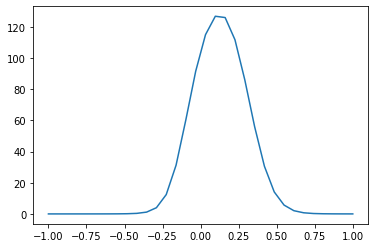

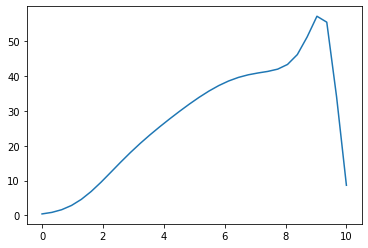

4480 1.7641243934631348


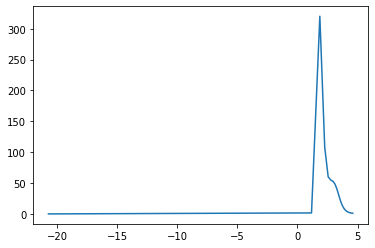

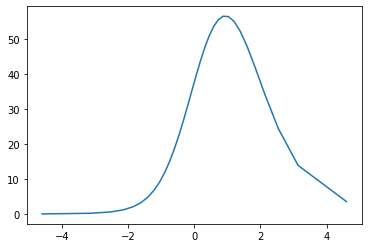

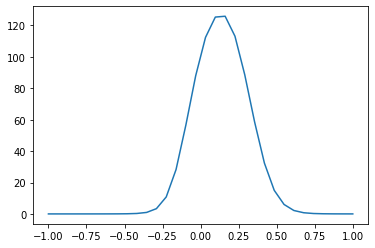

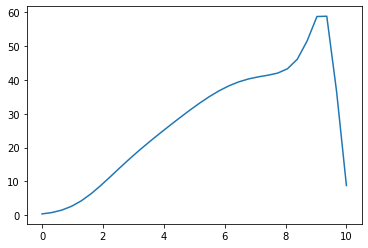

4608 1.7513456344604492


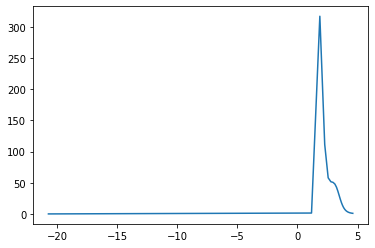

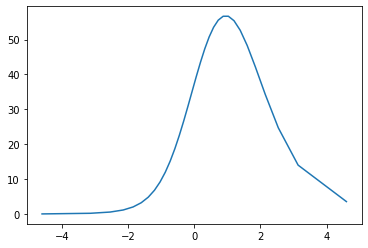

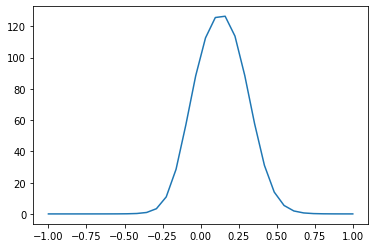

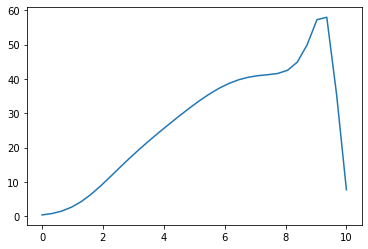

4736 1.7383410930633545


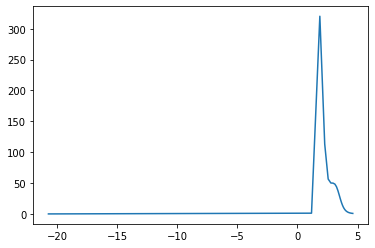

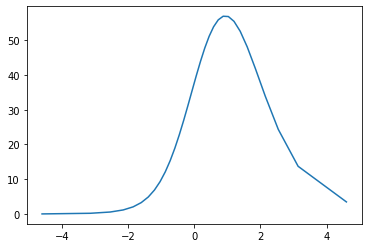

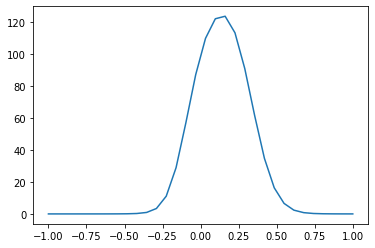

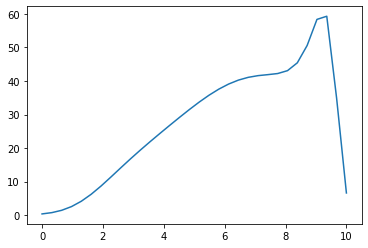

4864 1.7178667783737183


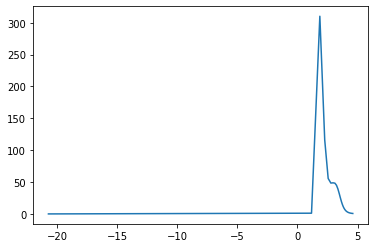

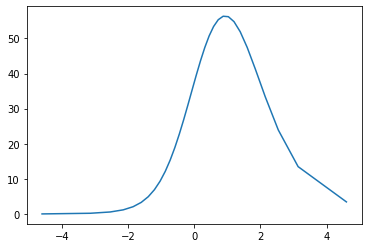

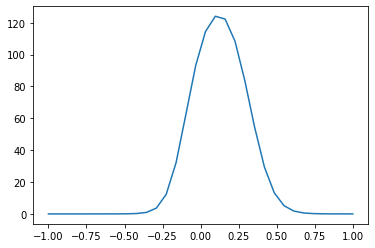

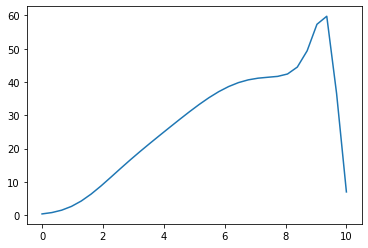

4992 1.7293205261230469


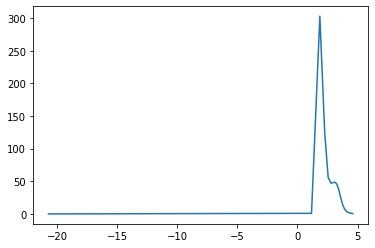

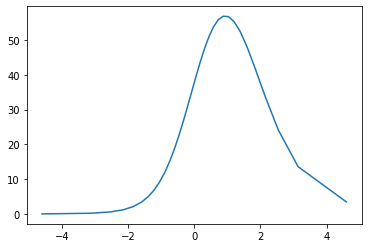

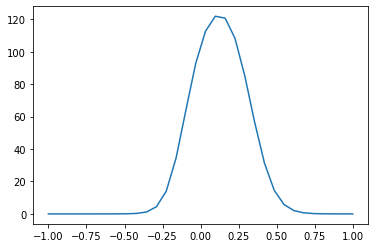

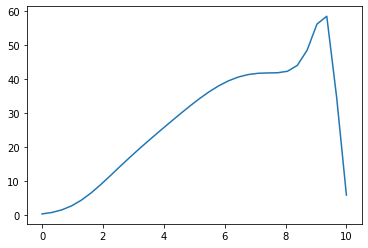

5120 1.7344557046890259


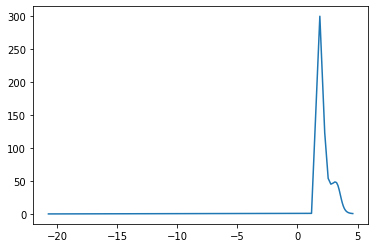

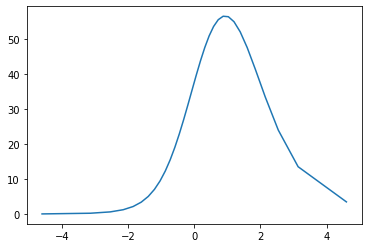

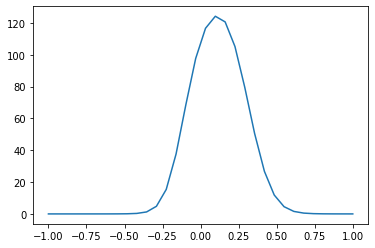

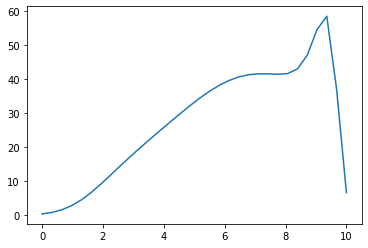

5248 1.7462947368621826


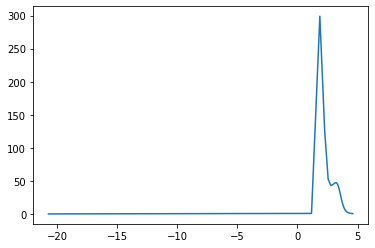

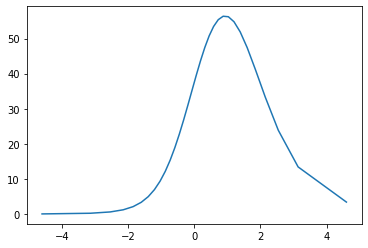

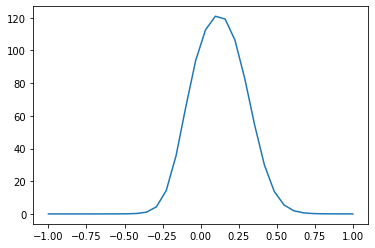

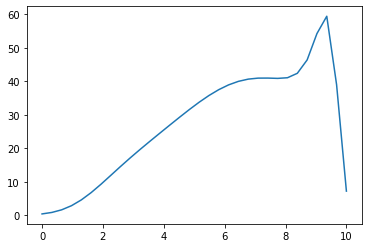

5376 1.707747220993042


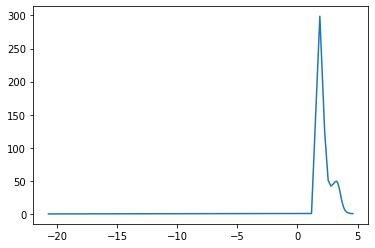

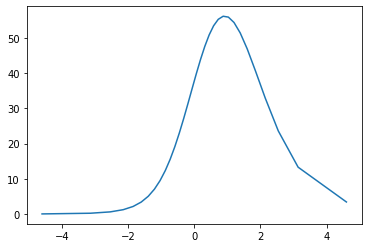

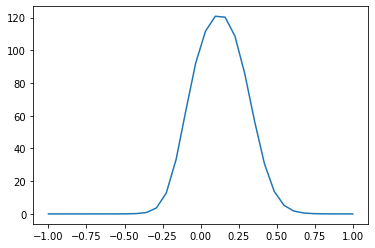

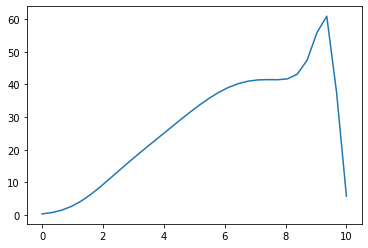

5504 1.7347394227981567


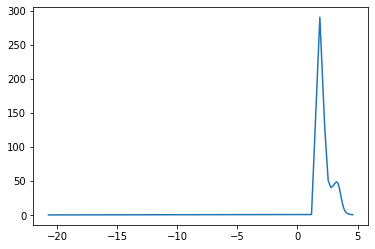

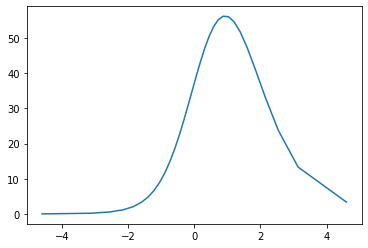

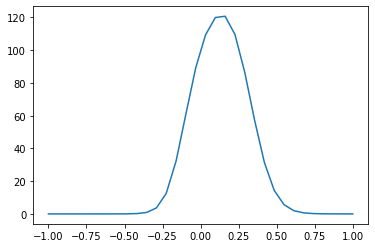

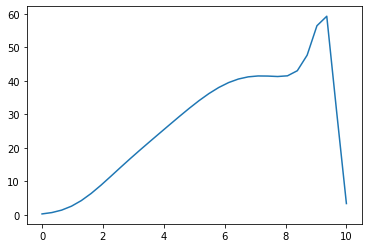

5632 1.7421331405639648


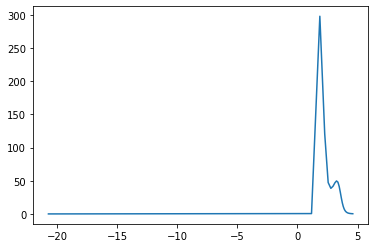

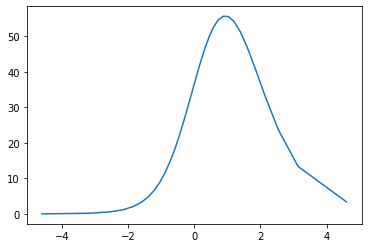

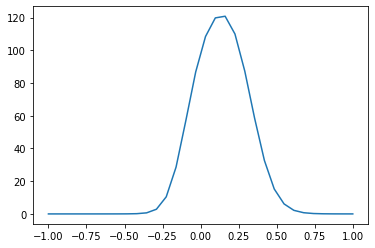

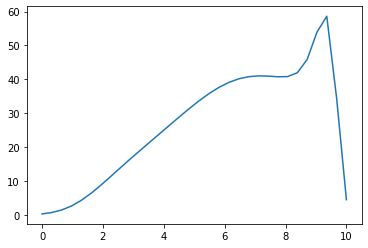

5760 1.7492722272872925


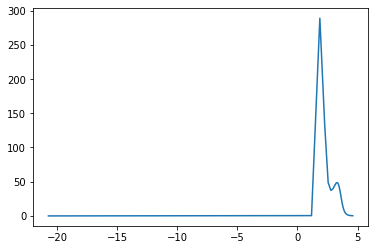

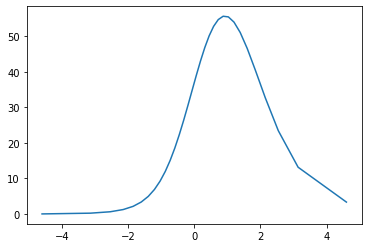

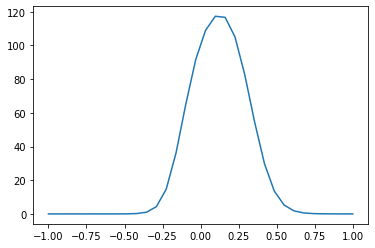

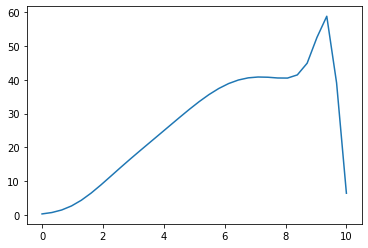

5888 1.7169725894927979


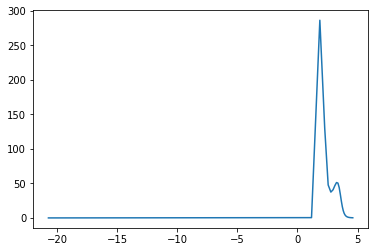

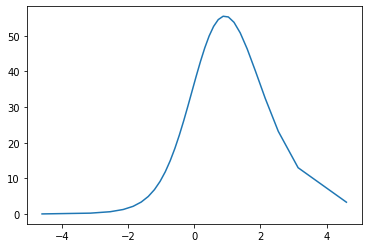

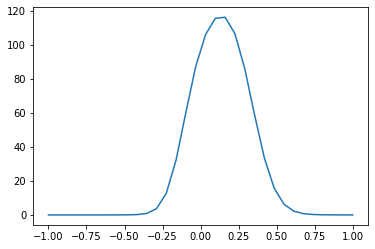

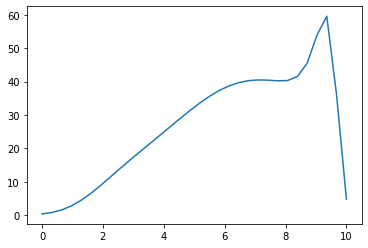

6016 1.73941171169281


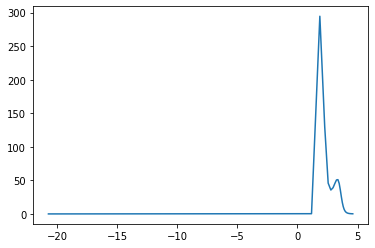

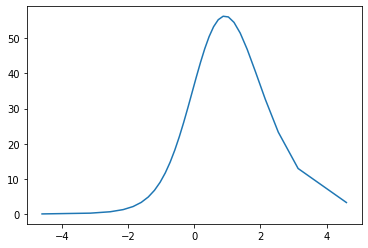

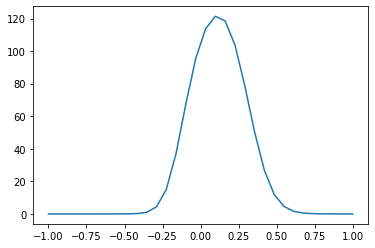

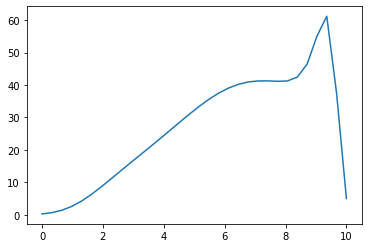

6144 1.7280614376068115


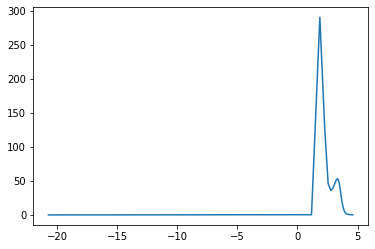

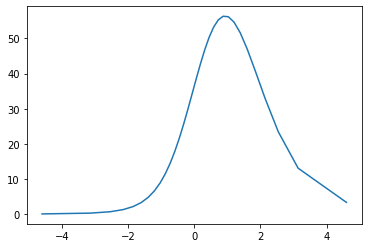

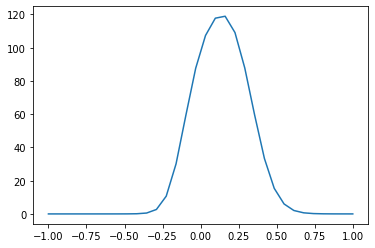

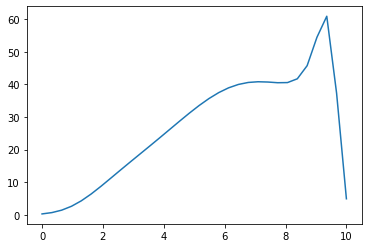

6272 1.7156866788864136


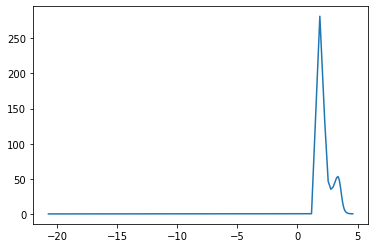

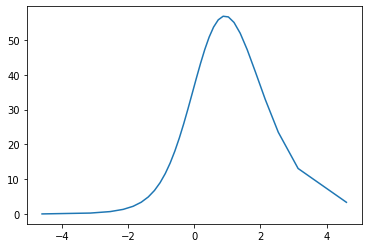

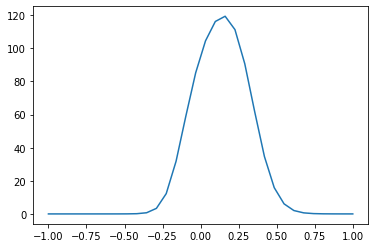

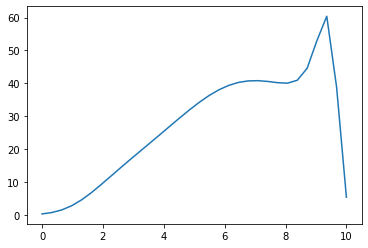

6400 1.7085996866226196


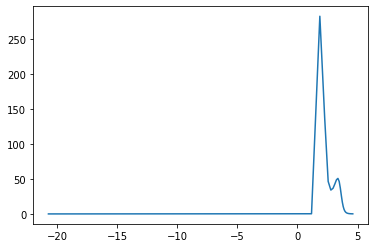

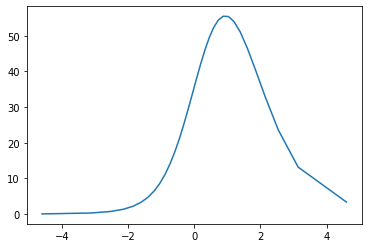

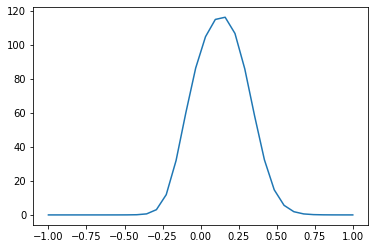

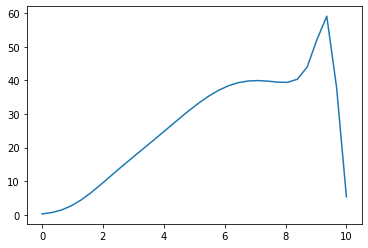

6528 1.7203800678253174


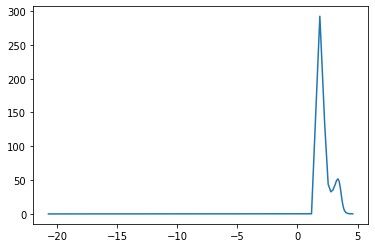

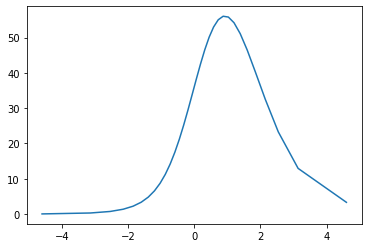

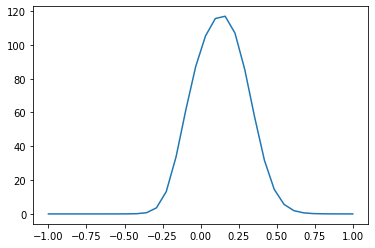

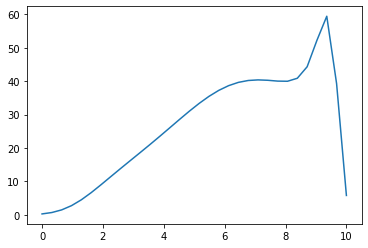

6656 1.7171001434326172


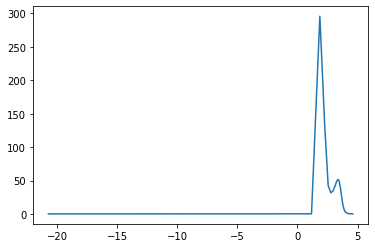

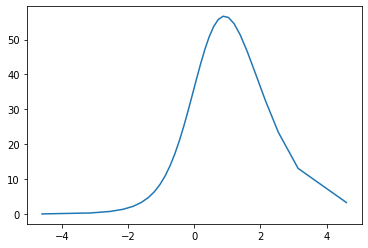

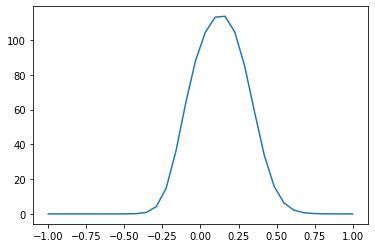

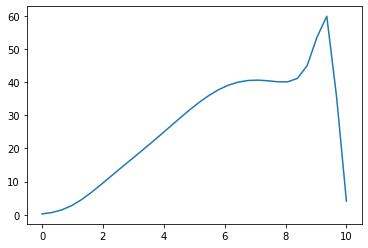

6784 1.7254756689071655


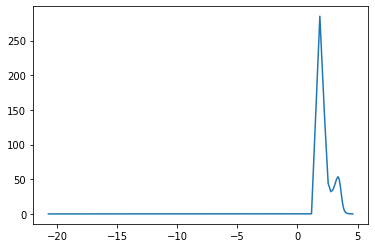

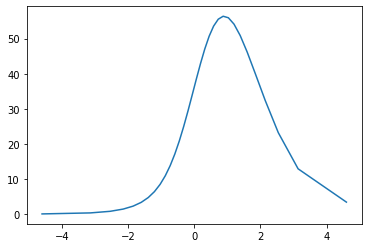

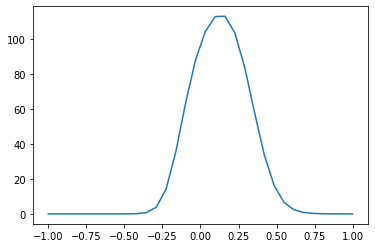

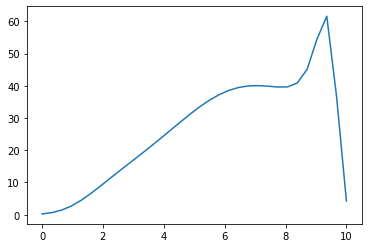

6912 1.7384226322174072


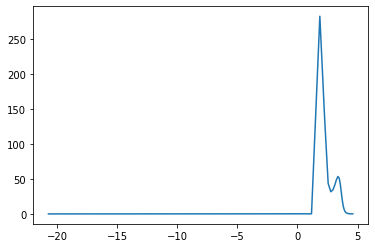

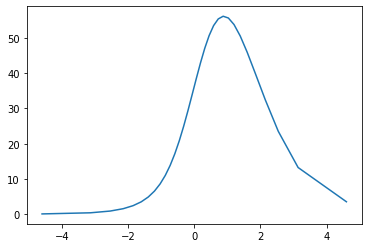

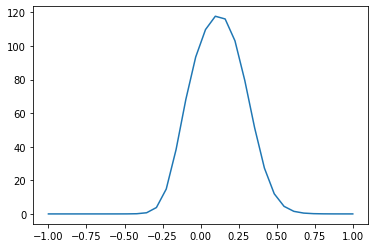

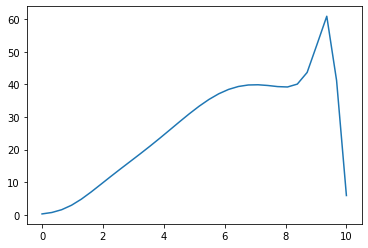

7040 1.7241435050964355


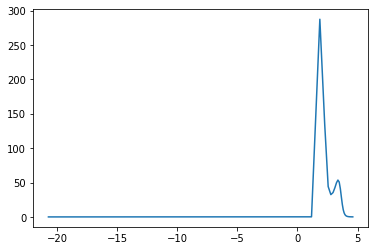

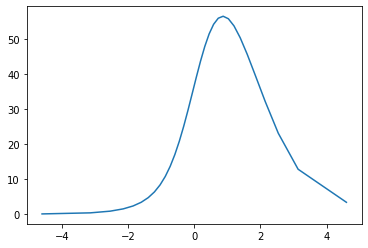

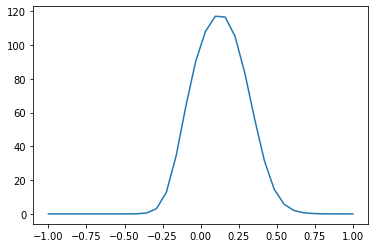

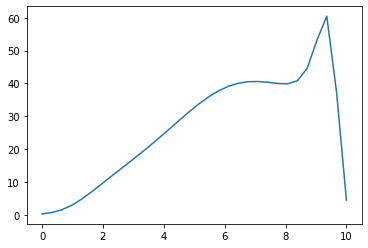

7168 1.7155824899673462


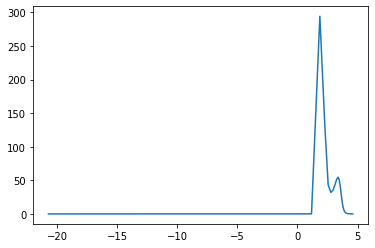

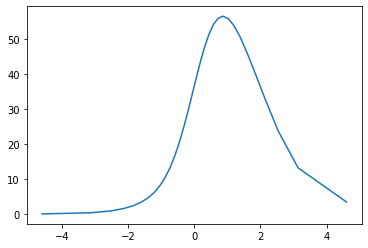

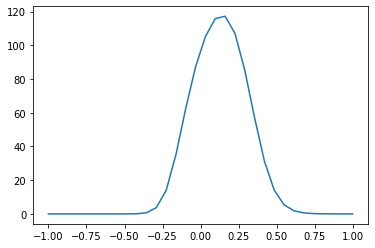

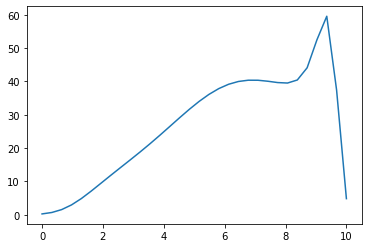

7296 1.7052602767944336


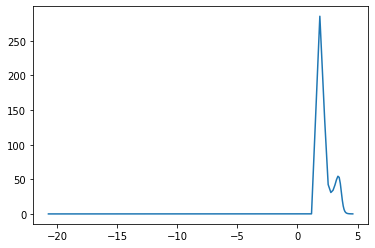

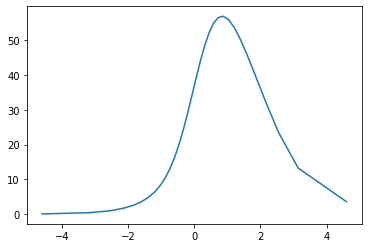

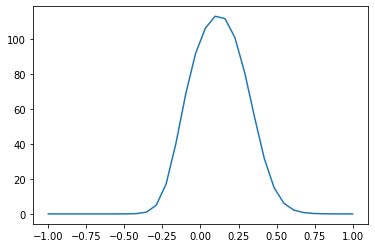

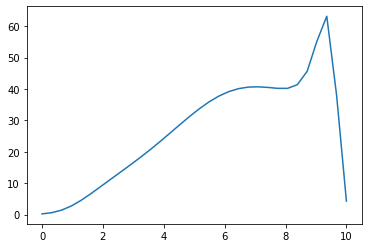

7424 1.739985466003418


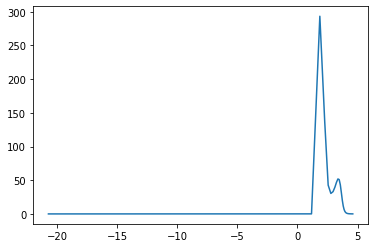

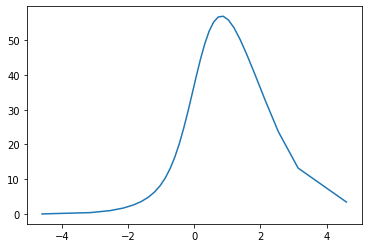

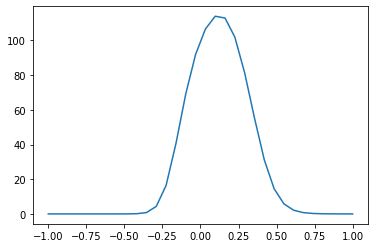

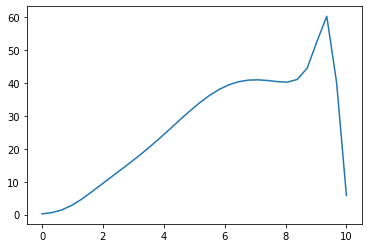

7552 1.7360988855361938


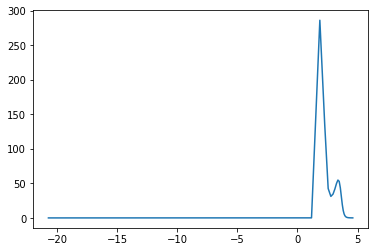

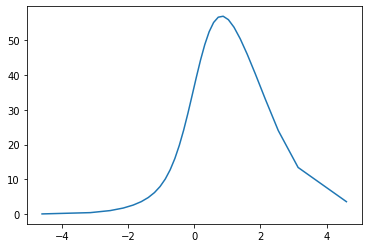

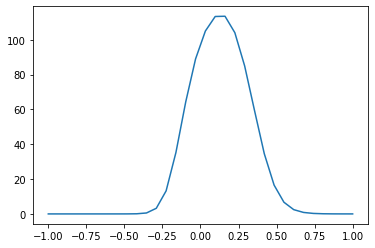

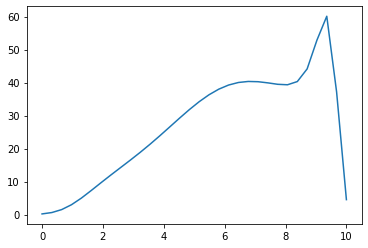

7680 1.7287378311157227


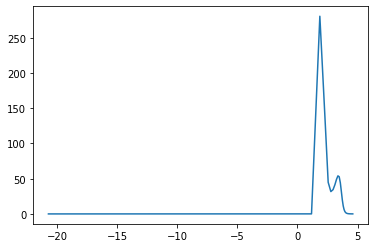

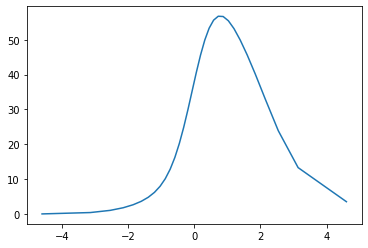

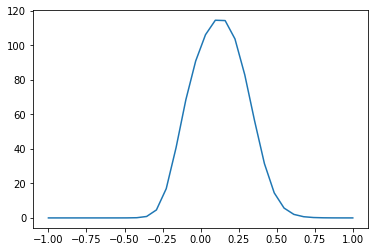

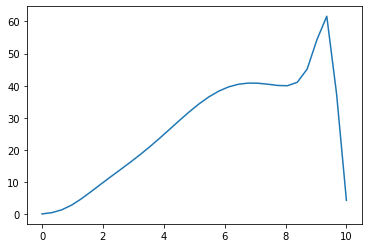

7808 1.7103859186172485


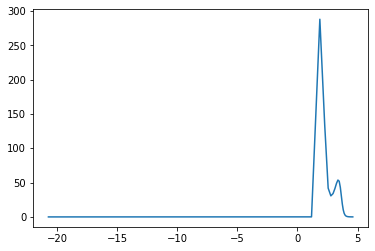

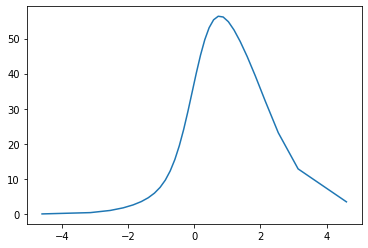

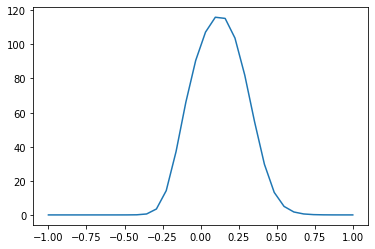

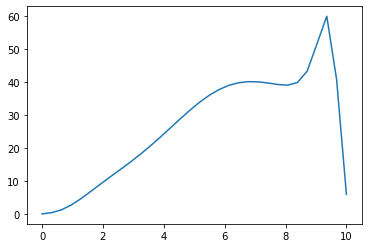

7936 1.72017502784729


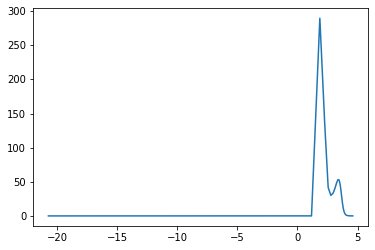

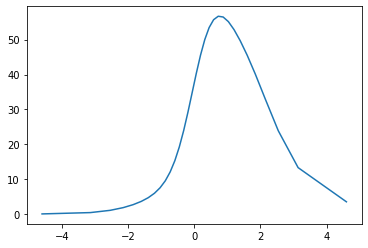

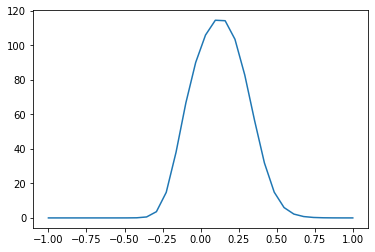

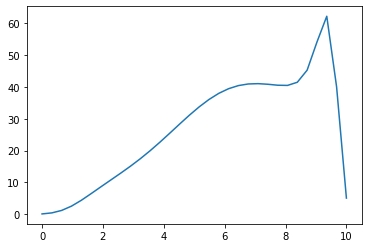

8064 1.7402386665344238


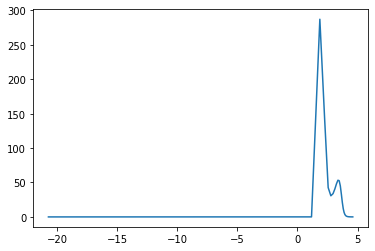

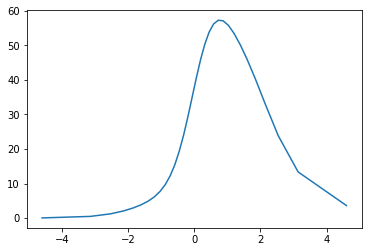

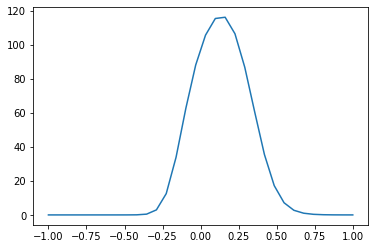

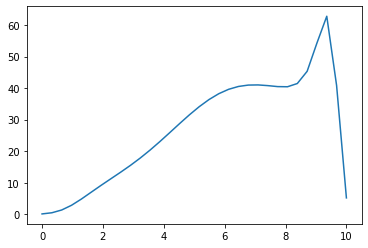

8192 1.716210126876831


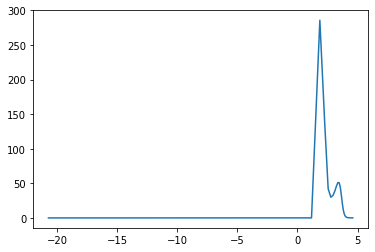

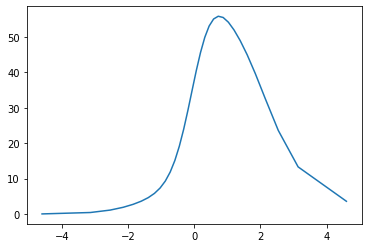

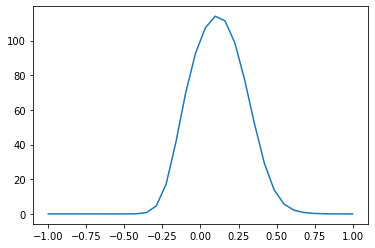

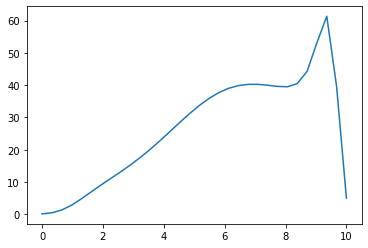

8320 1.709596872329712


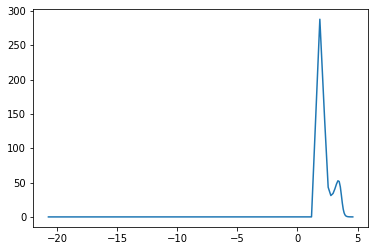

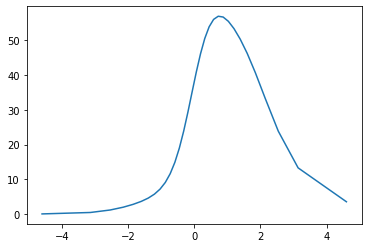

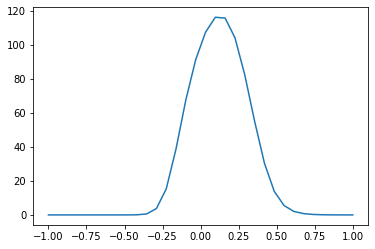

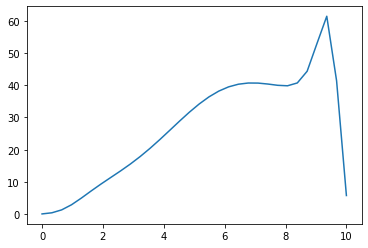

8448 1.7130916118621826


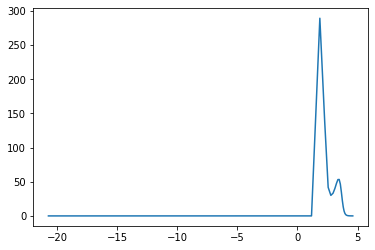

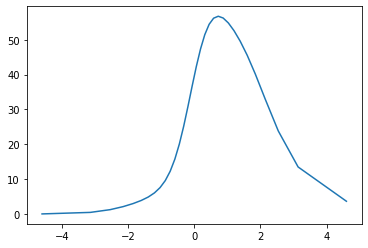

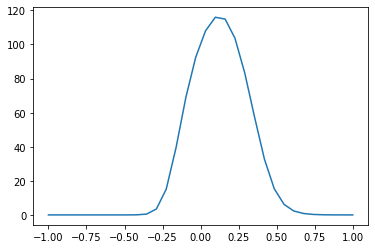

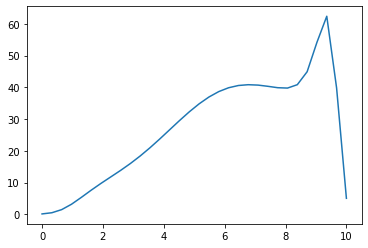

8576 1.73201584815979


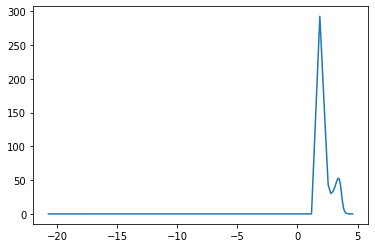

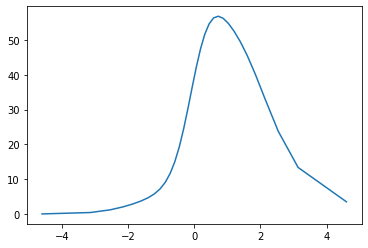

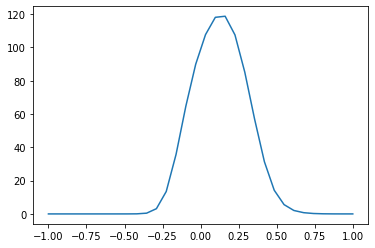

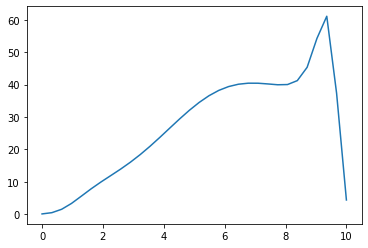

8704 1.7087674140930176


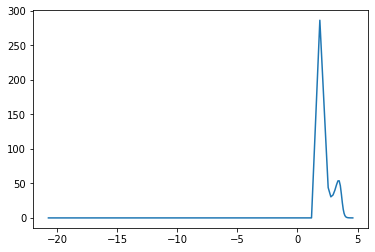

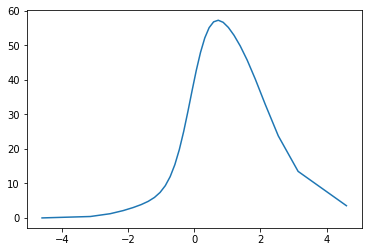

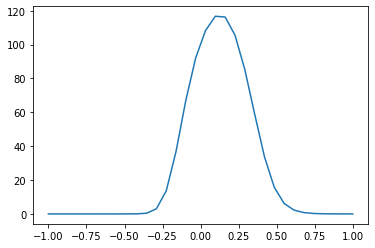

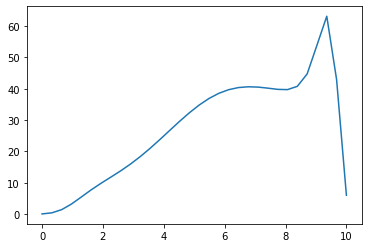

8832 1.734647274017334


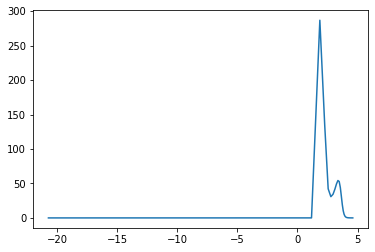

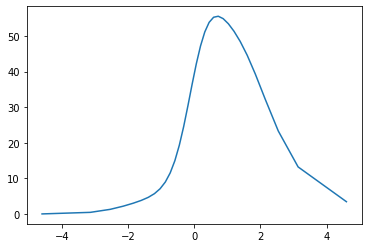

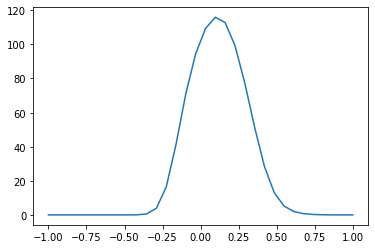

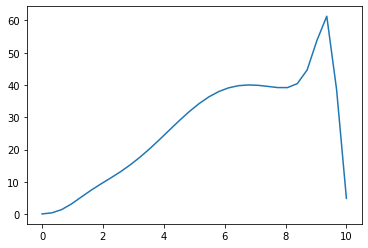

8960 1.7446675300598145


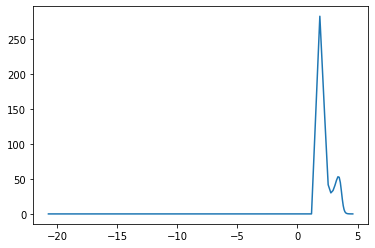

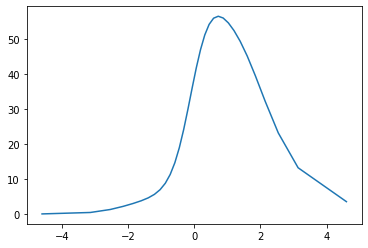

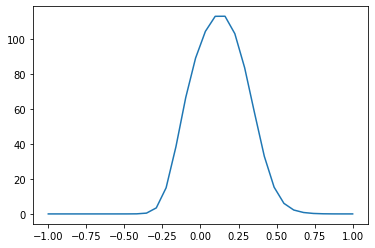

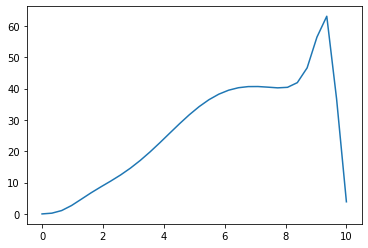

9088 1.7293314933776855


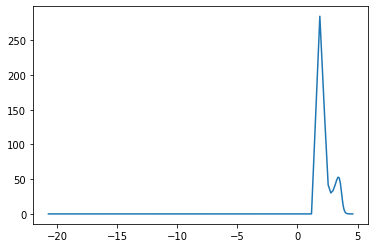

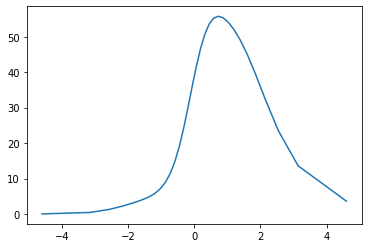

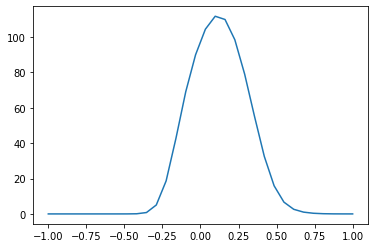

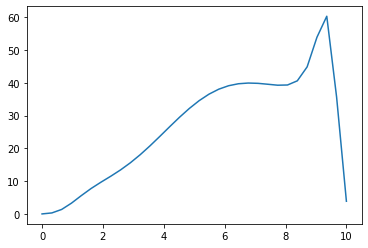

9216 1.6989237070083618


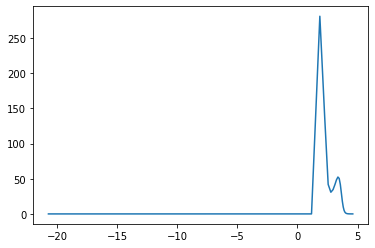

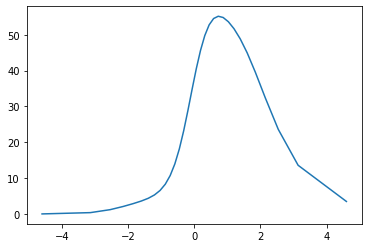

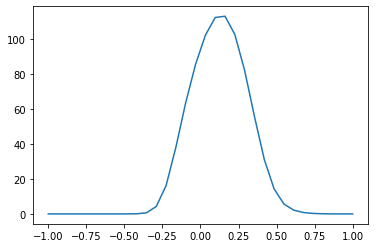

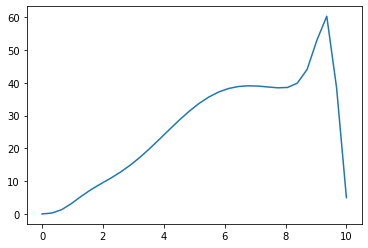

9344 1.6988462209701538


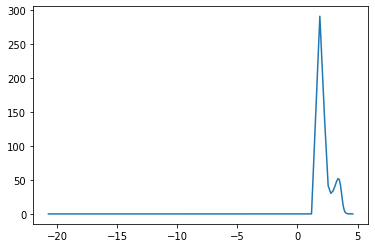

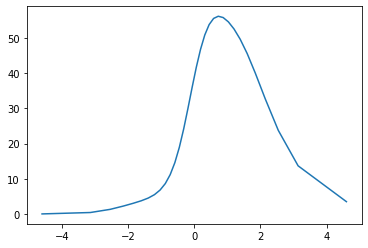

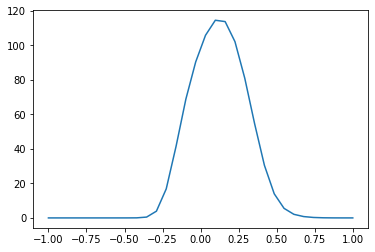

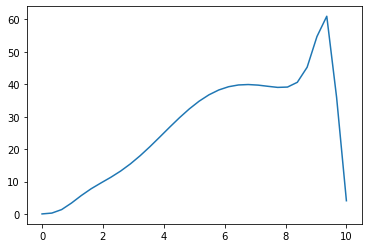

9472 1.6926848888397217


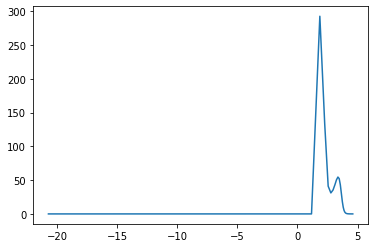

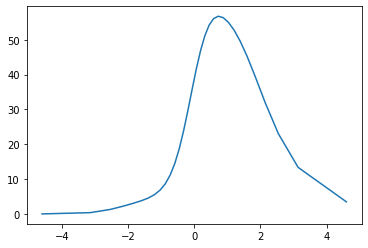

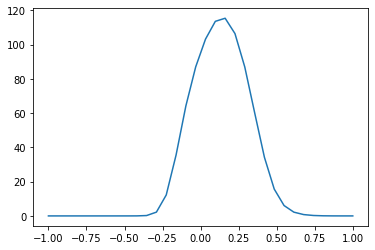

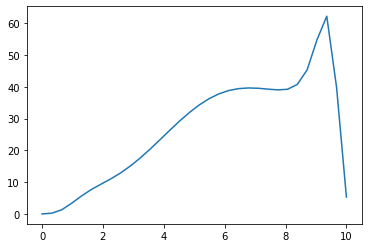

9600 1.7147459983825684


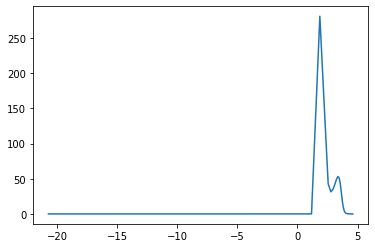

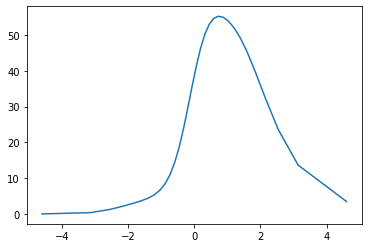

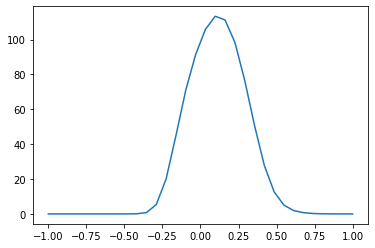

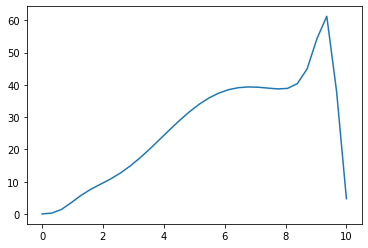

9728 1.7260183095932007


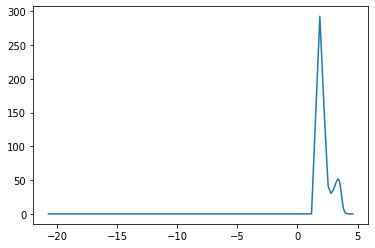

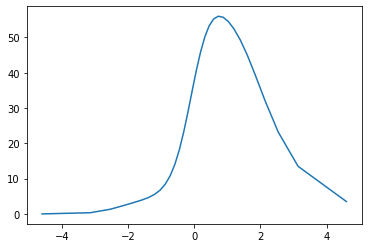

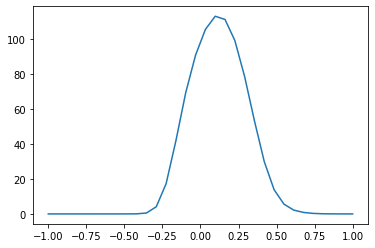

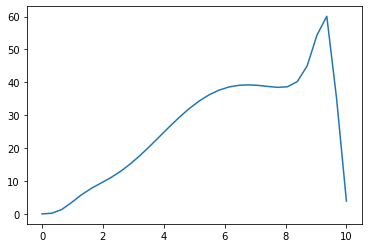

9856 1.7214630842208862


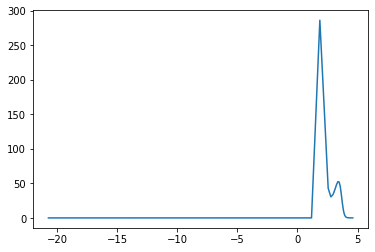

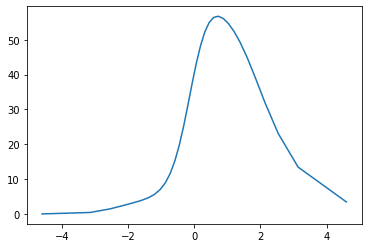

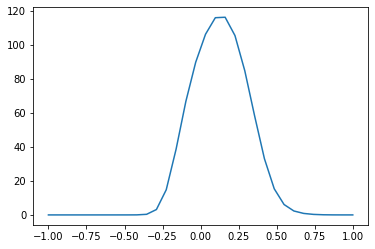

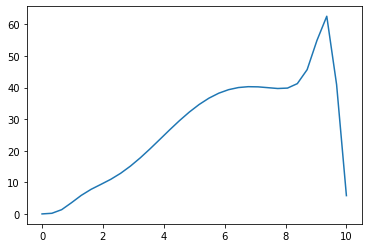

9984 1.7132891416549683


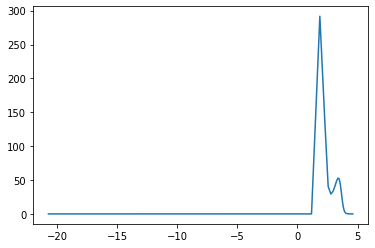

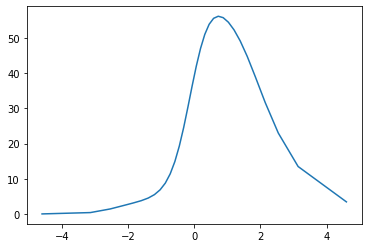

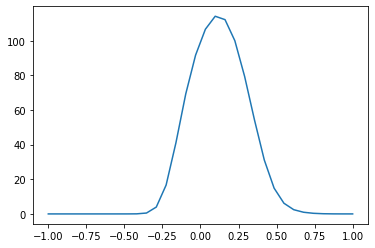

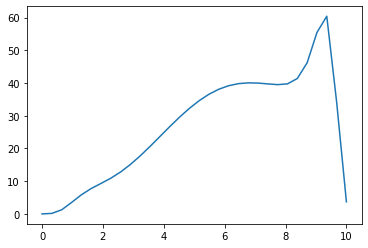

10112 1.7245144844055176


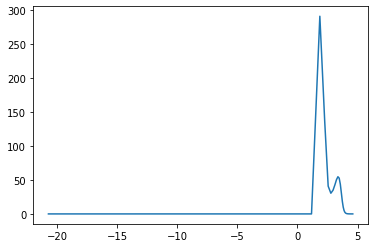

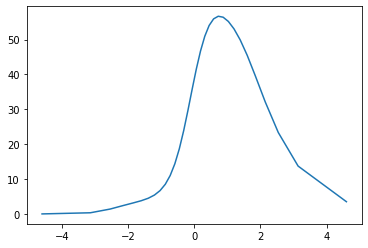

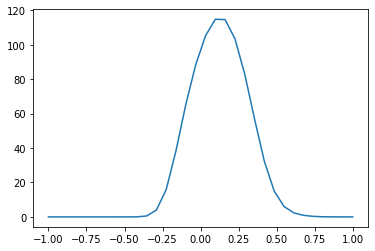

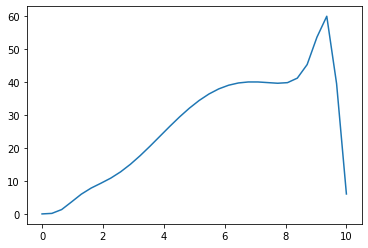

10240 1.7469857931137085


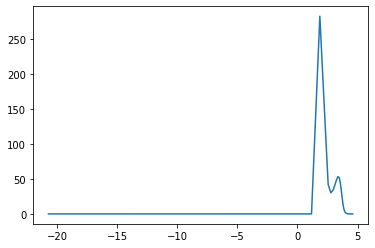

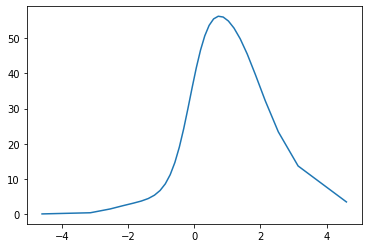

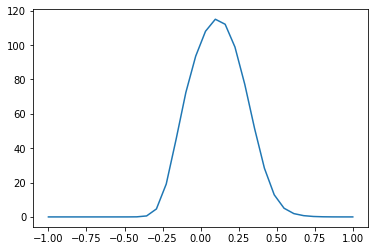

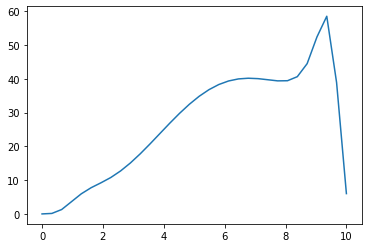

10368 1.7367205619812012


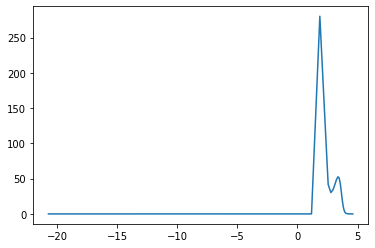

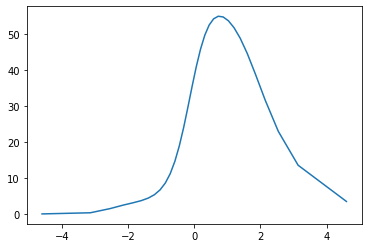

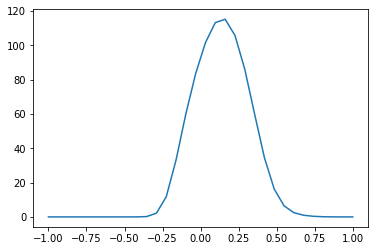

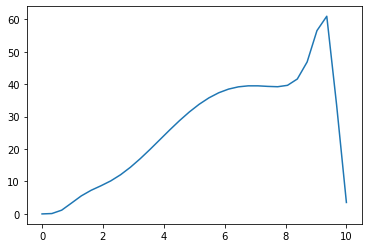

10496 1.7092669010162354


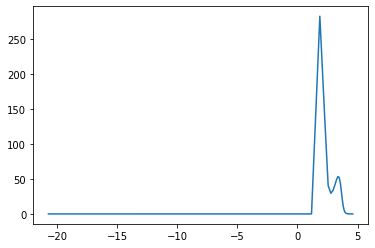

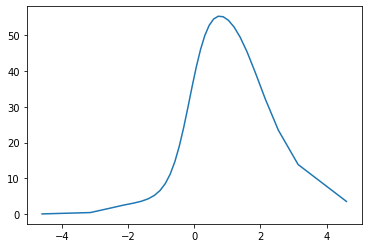

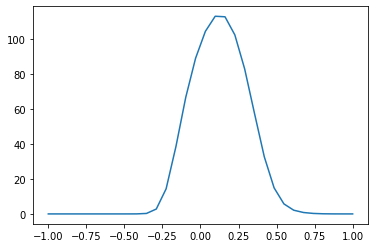

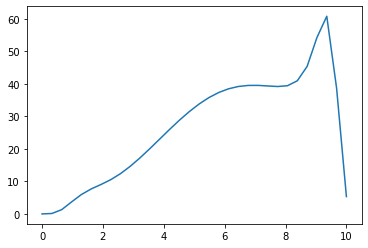

10624 1.7106356620788574


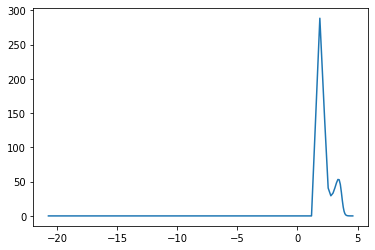

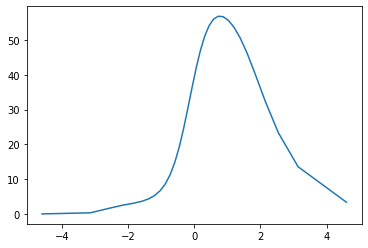

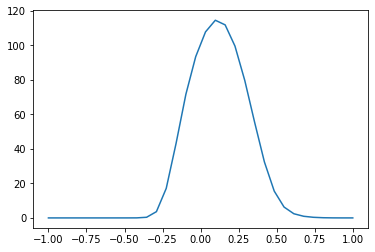

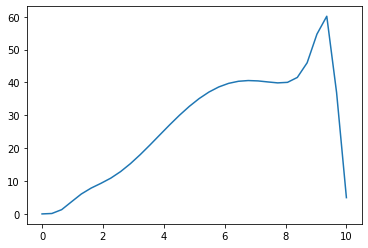

10752 1.7266165018081665


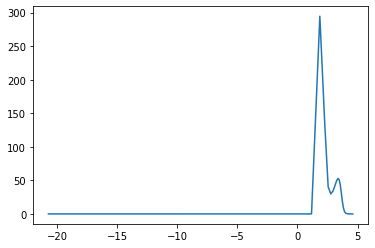

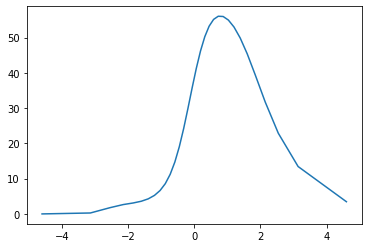

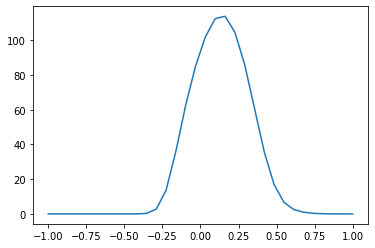

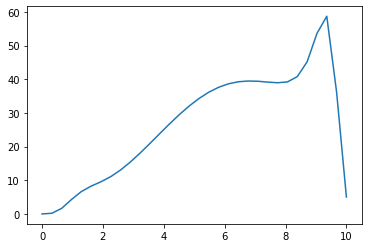

10880 1.7419450283050537


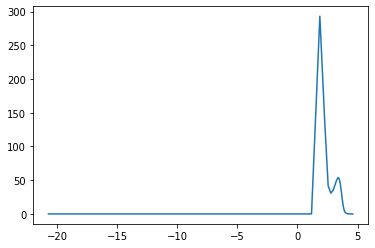

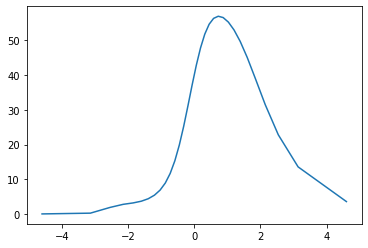

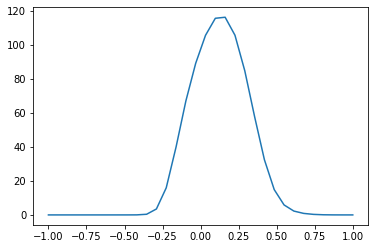

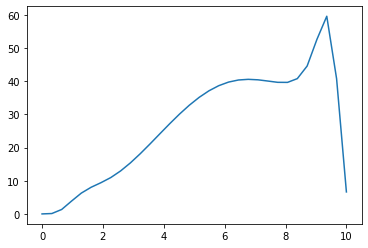

11008 1.7388617992401123


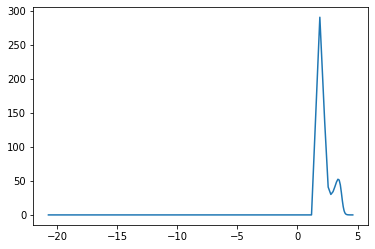

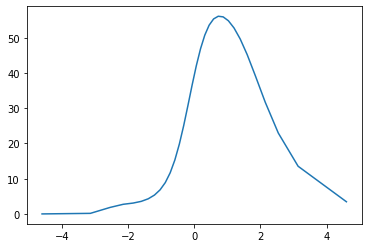

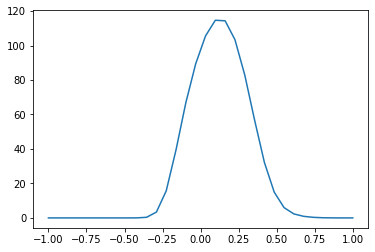

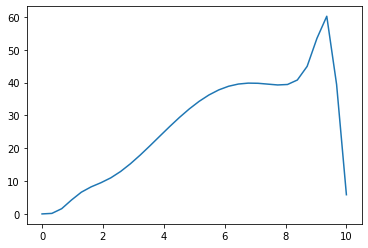

11136 1.69562566280365


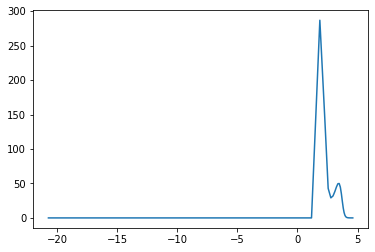

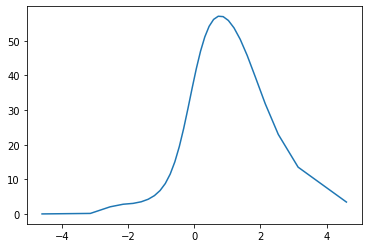

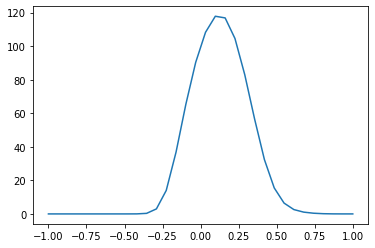

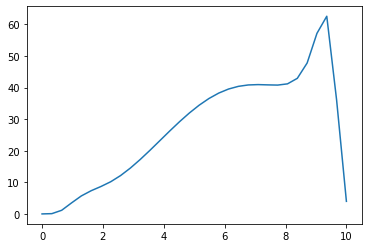

11264 1.721790075302124


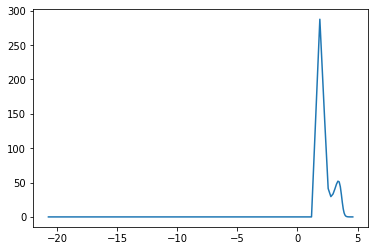

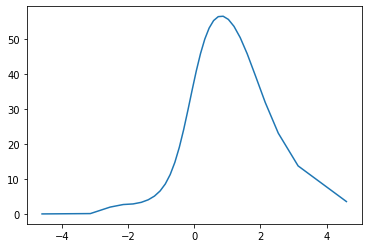

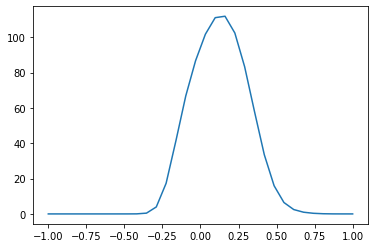

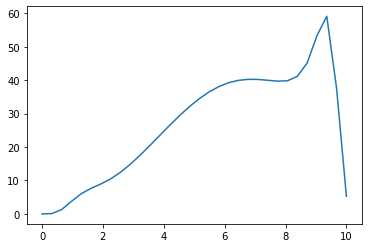

11392 1.7156237363815308


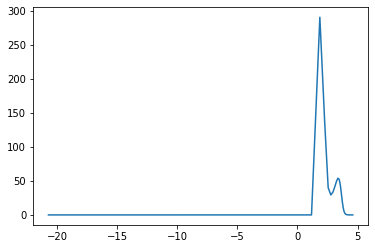

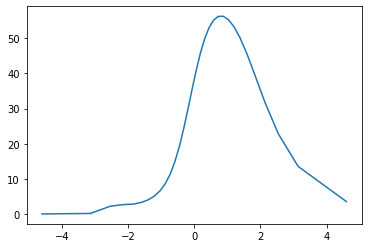

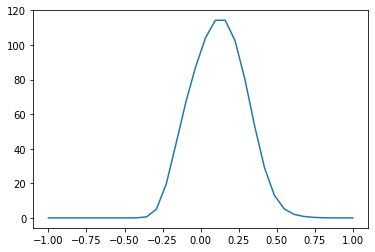

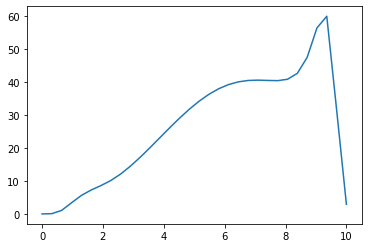

11520 1.7184404134750366


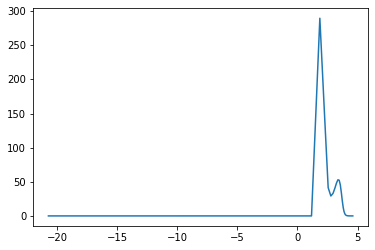

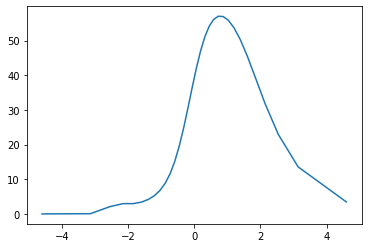

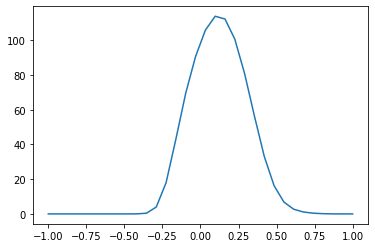

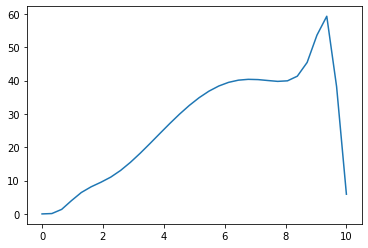

11648 1.7098573446273804


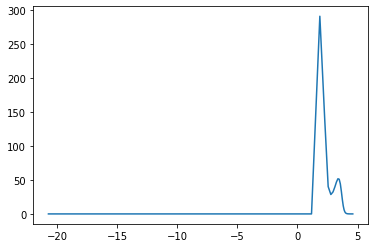

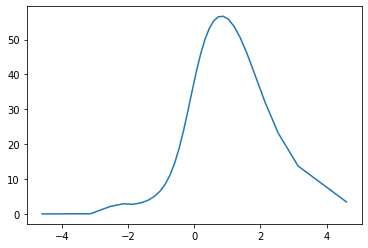

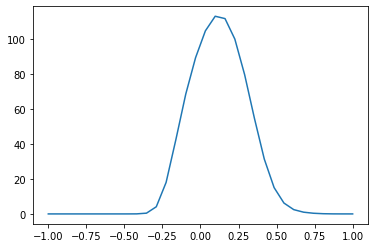

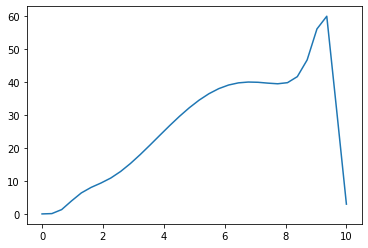

11776 1.7116186618804932


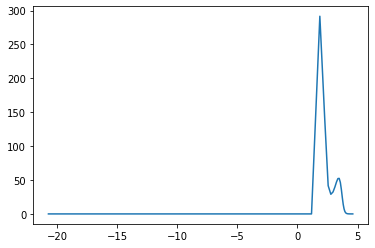

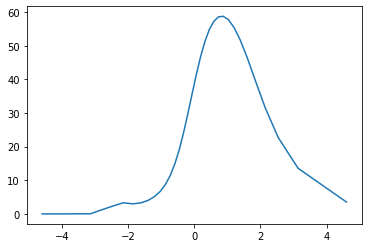

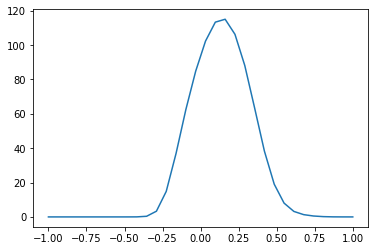

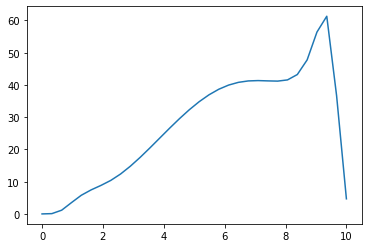

11904 1.6889865398406982


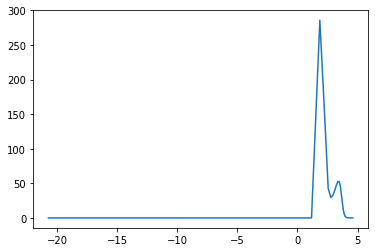

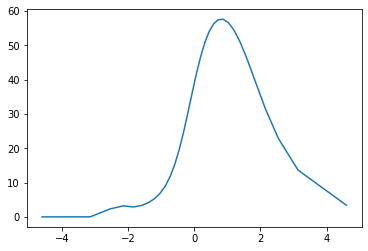

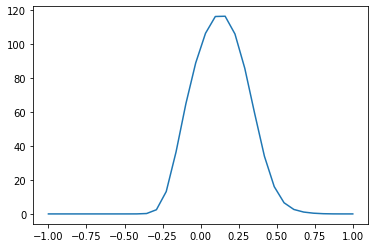

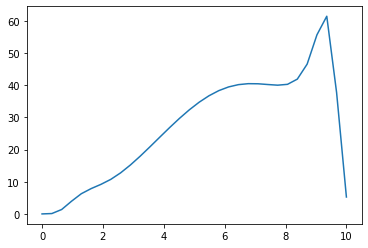

12032 1.6873077154159546


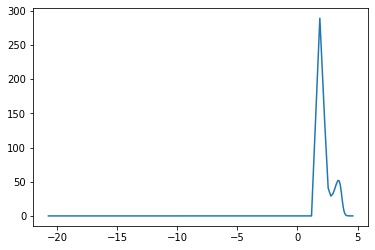

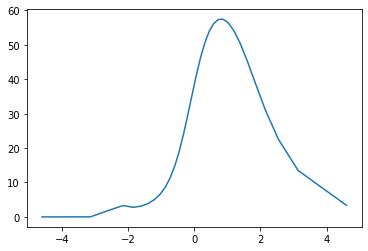

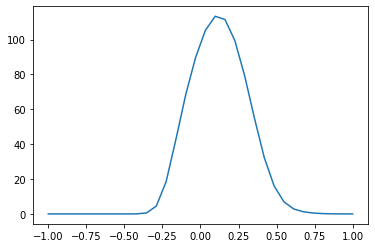

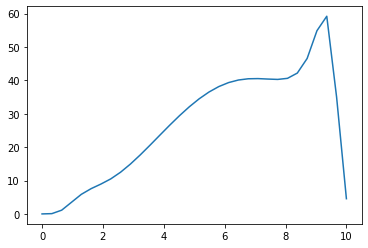

12160 1.7204583883285522


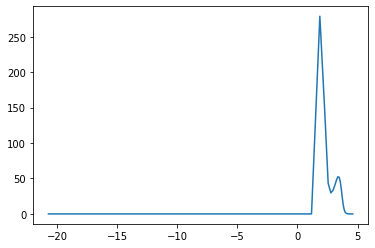

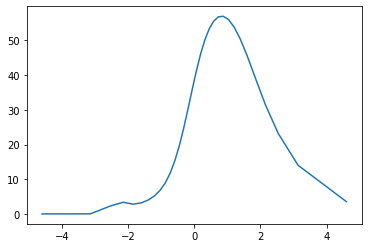

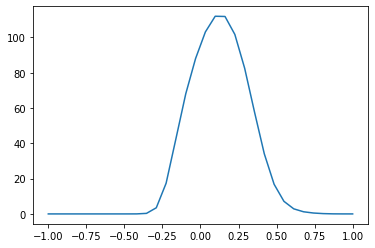

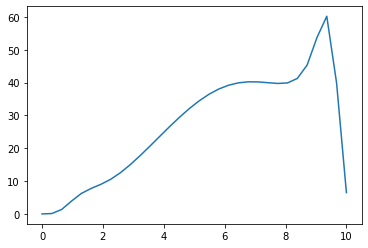

12288 1.6968774795532227


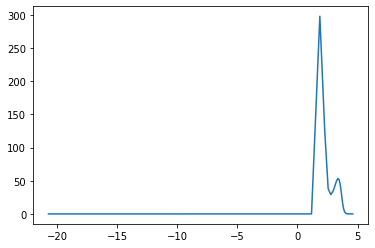

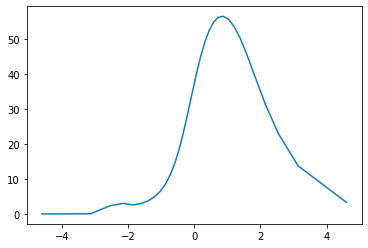

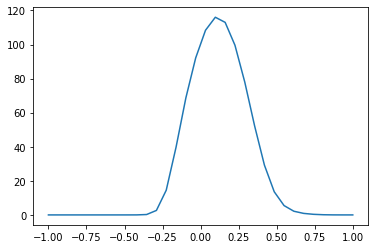

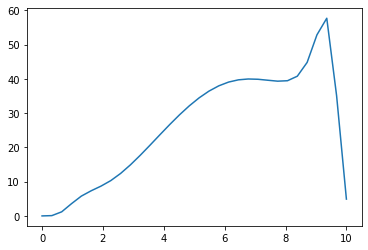

12416 1.7183949947357178


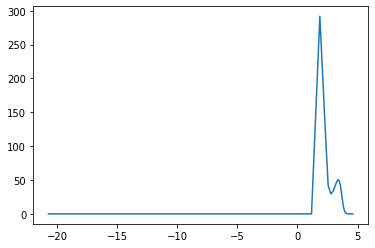

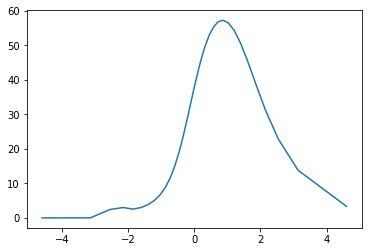

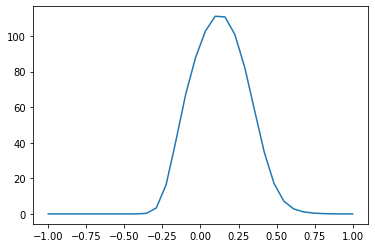

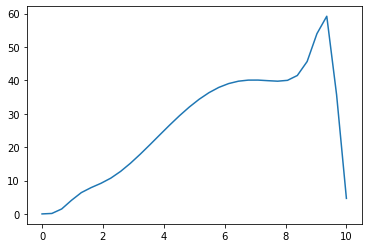

12544 1.6869232654571533


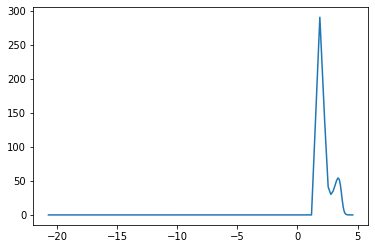

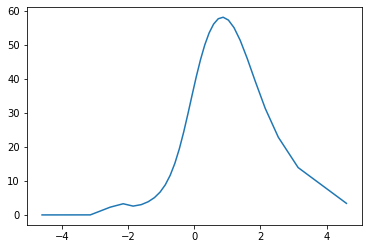

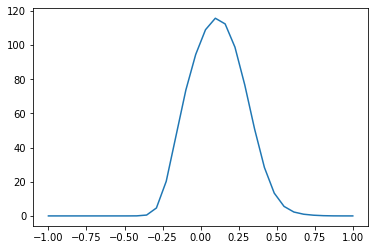

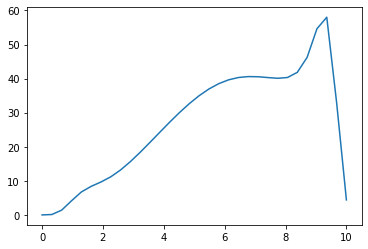

12672 1.7023978233337402


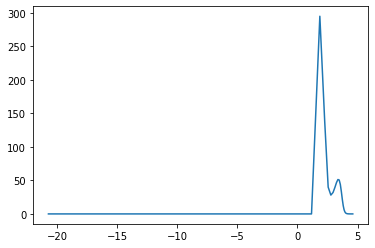

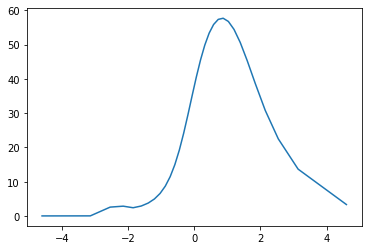

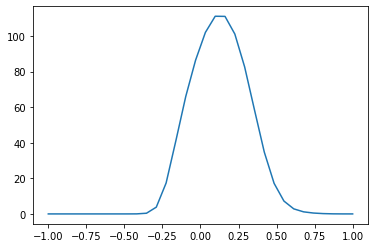

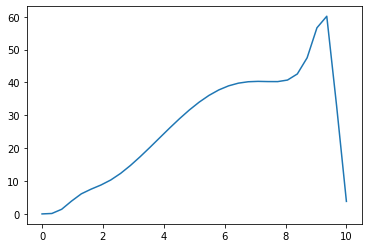

12800 1.721027135848999


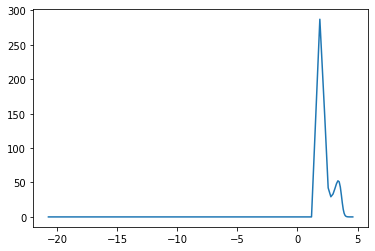

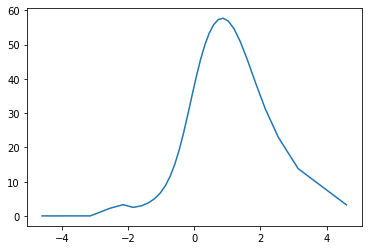

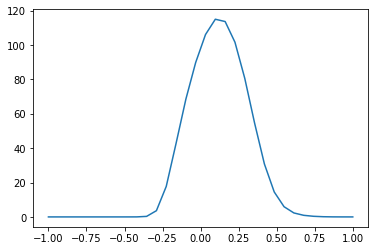

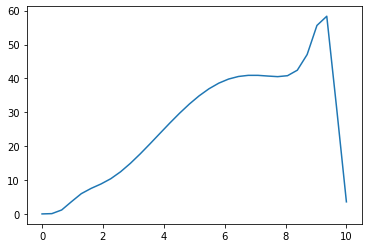

12928 1.706007957458496


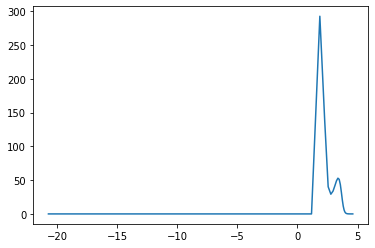

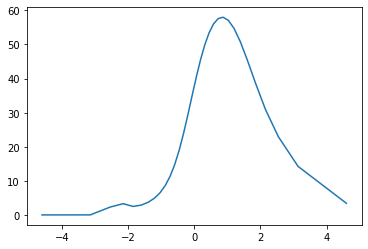

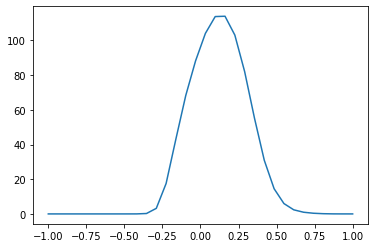

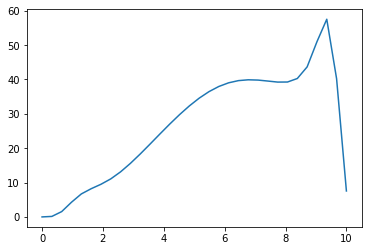

13056 1.70281183719635


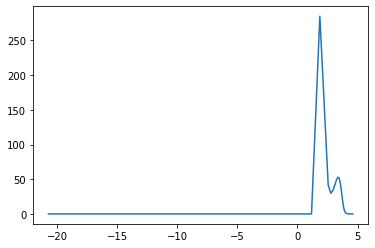

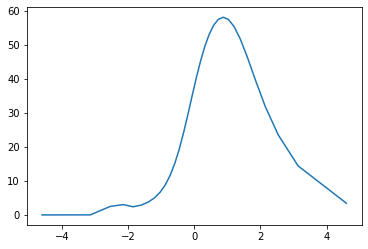

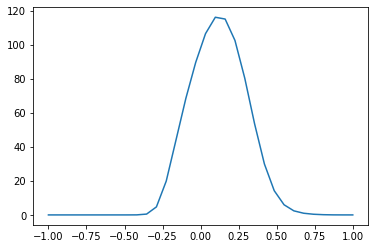

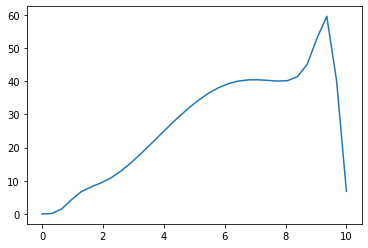

13184 1.7236695289611816


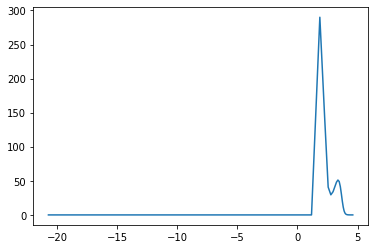

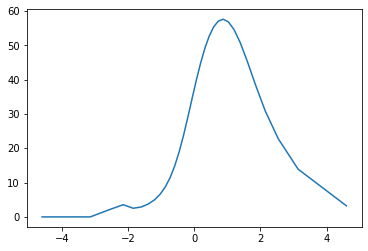

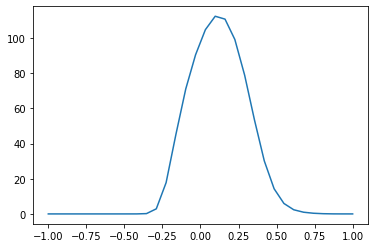

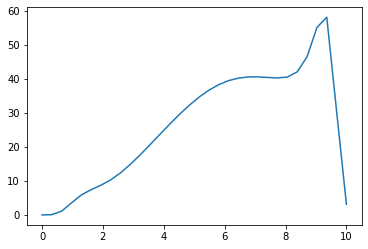

13312 1.7030385732650757


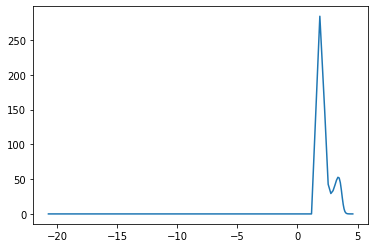

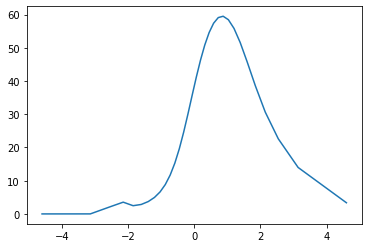

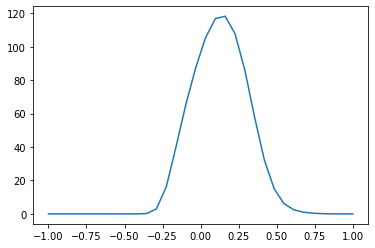

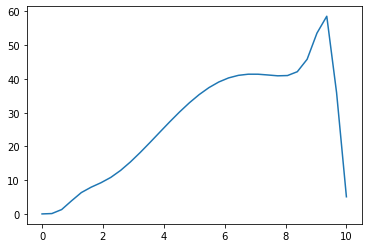

13440 1.6976975202560425


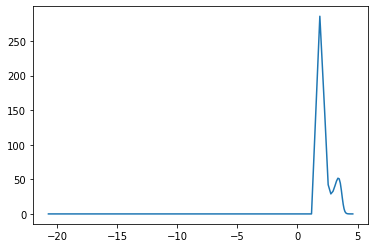

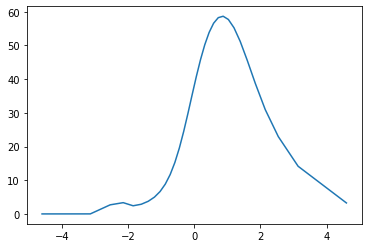

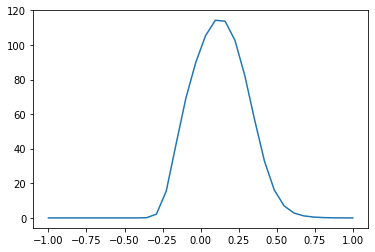

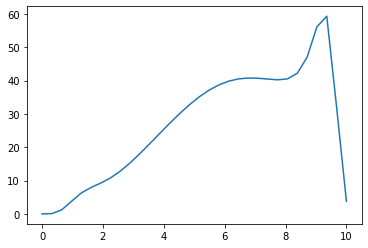

13568 1.7163710594177246


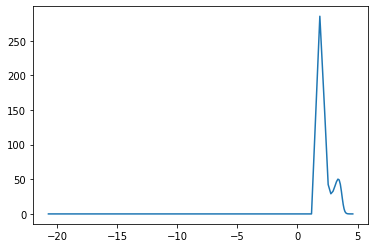

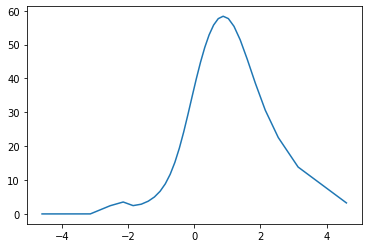

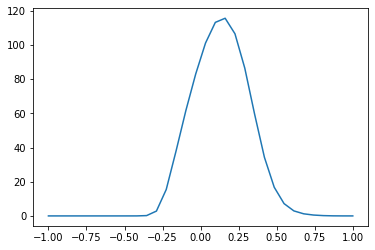

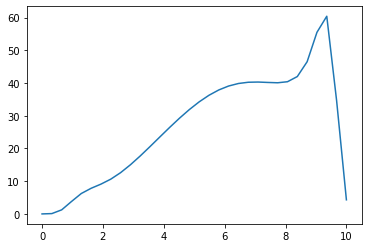

13696 1.72590172290802


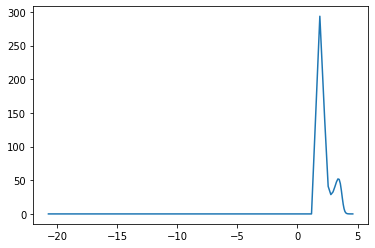

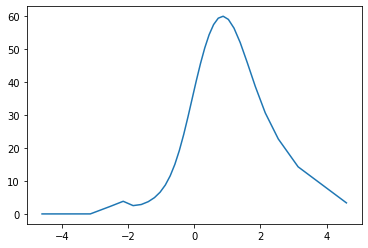

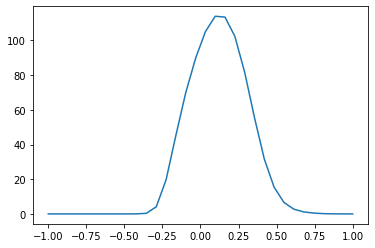

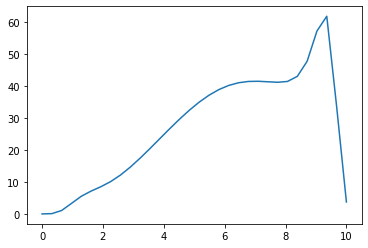

13824 1.7069636583328247


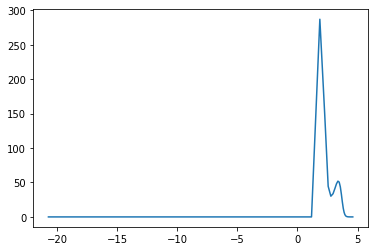

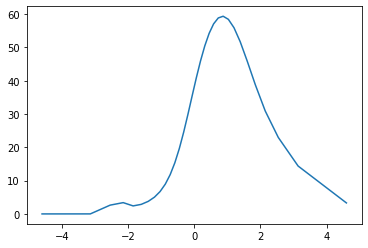

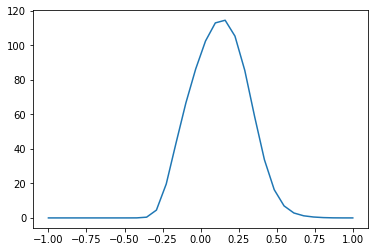

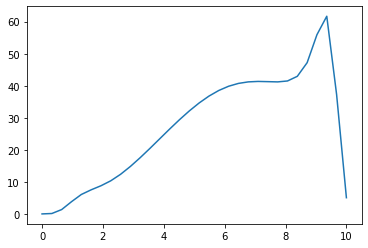

13952 1.7356451749801636


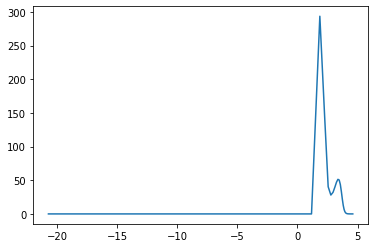

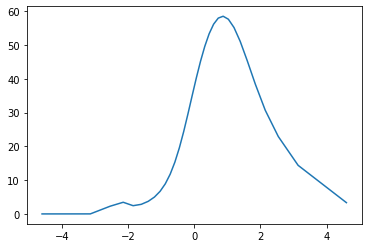

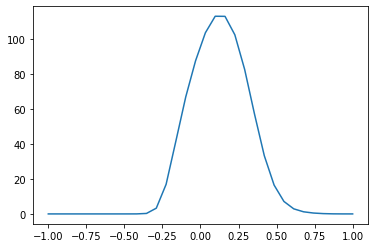

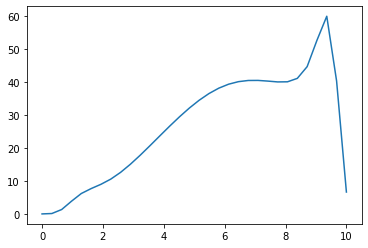

14080 1.7022881507873535


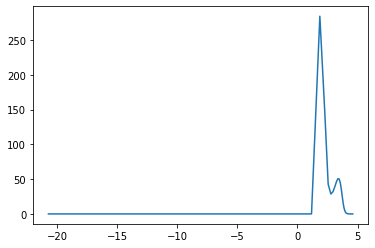

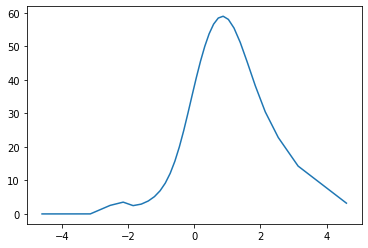

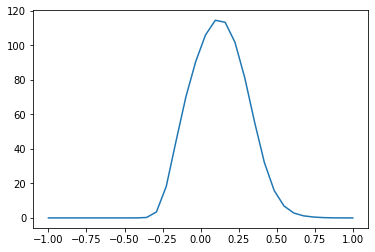

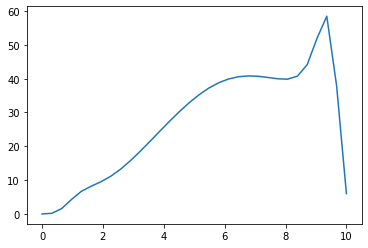

14208 1.702995777130127


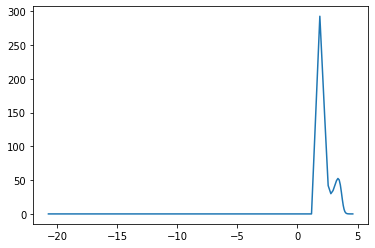

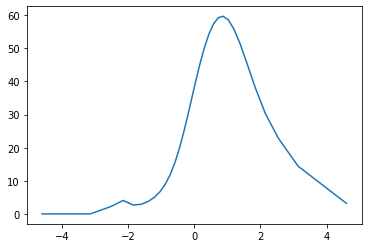

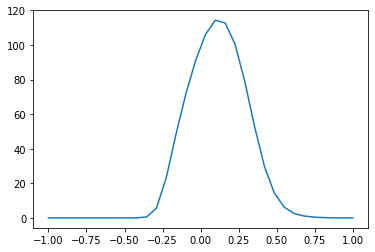

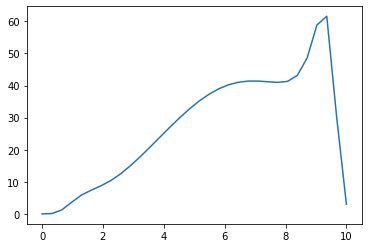

14336 1.717721700668335


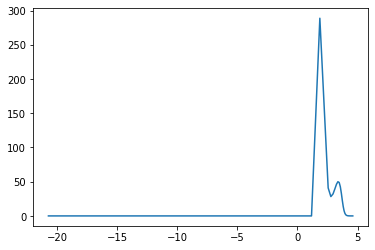

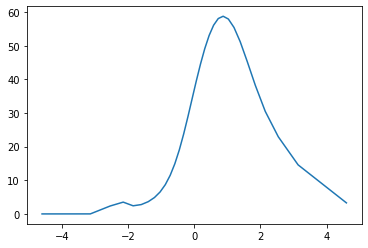

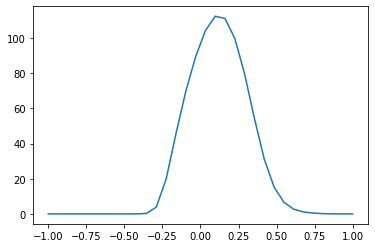

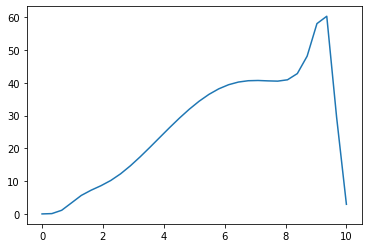

14464 1.729843020439148


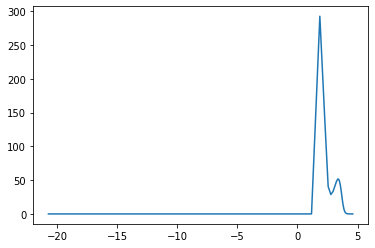

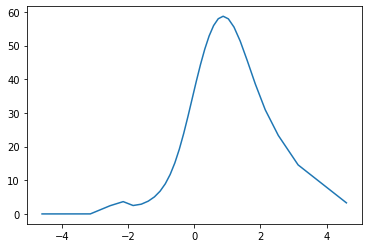

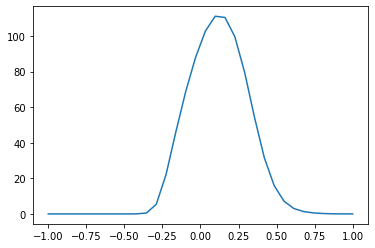

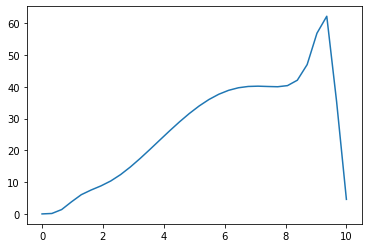

14592 1.711039662361145


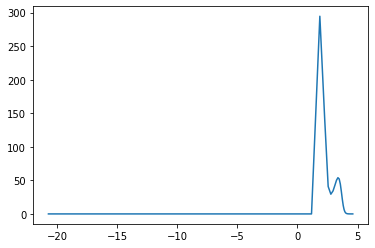

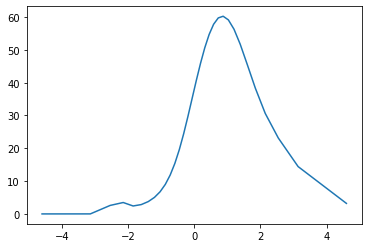

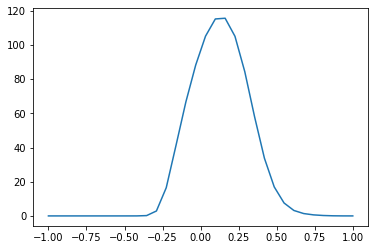

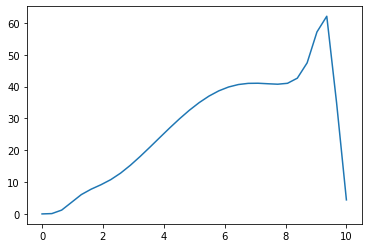

14720 1.7179349660873413


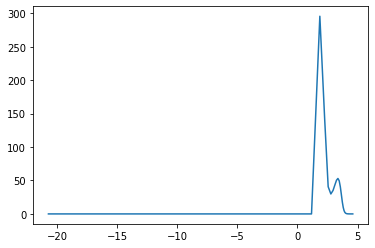

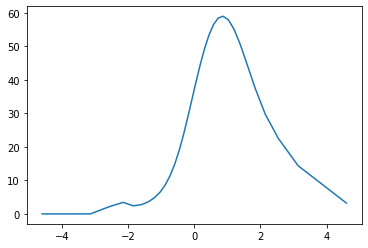

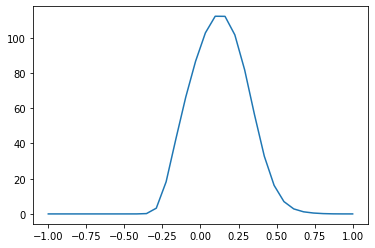

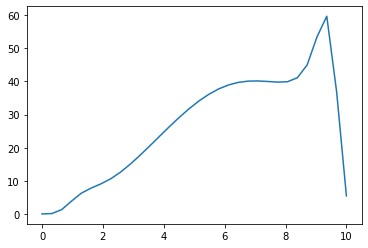

14848 1.7126238346099854


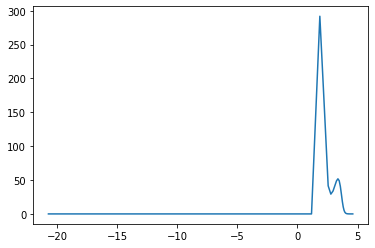

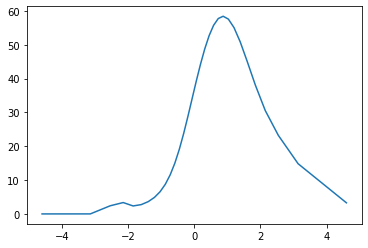

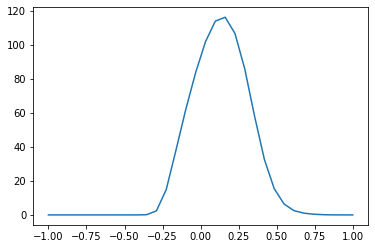

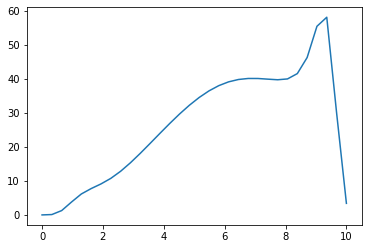

14976 1.7081689834594727


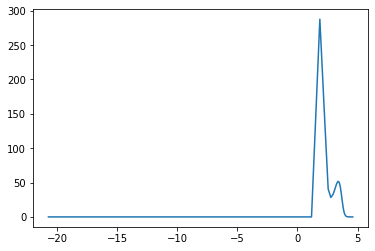

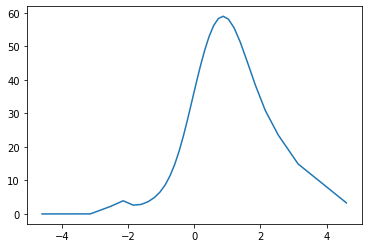

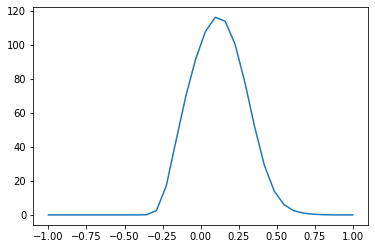

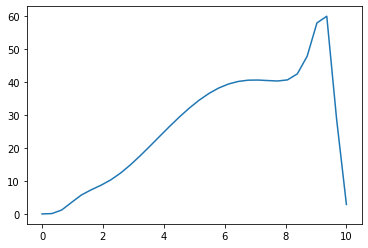

15104 1.706275463104248


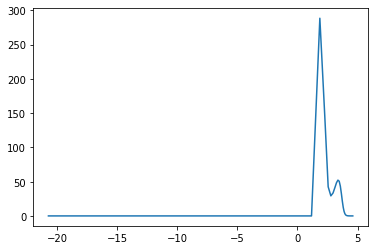

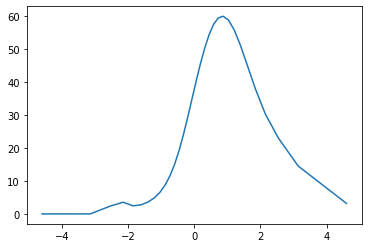

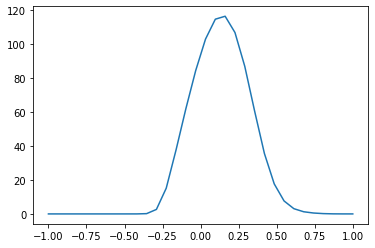

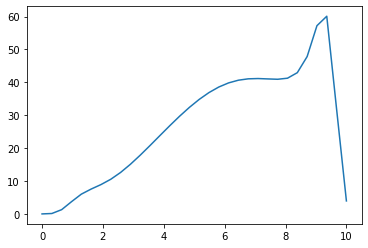

15232 1.6798961162567139


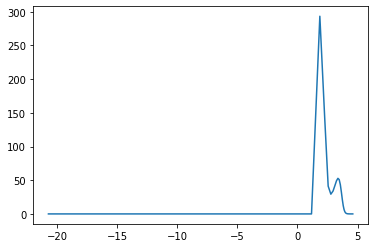

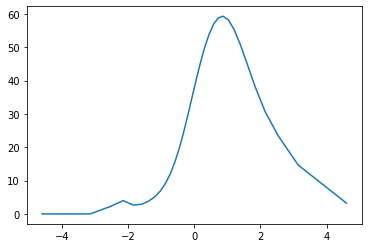

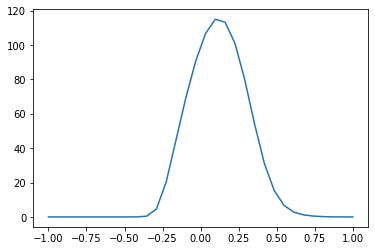

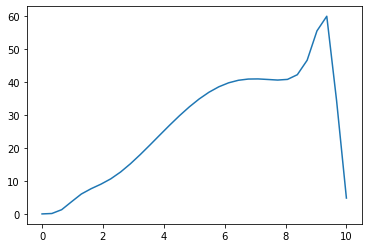

15360 1.7025647163391113


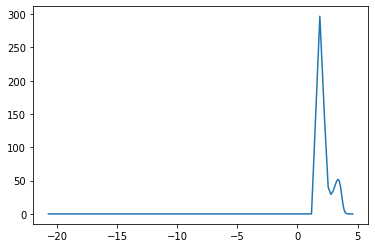

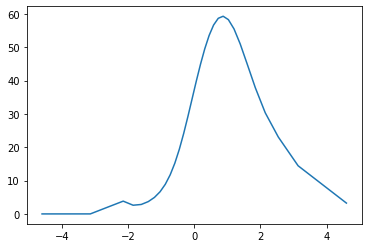

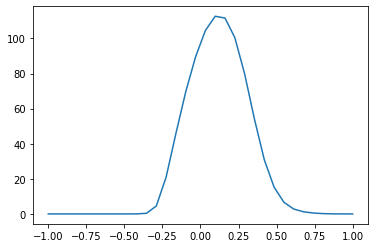

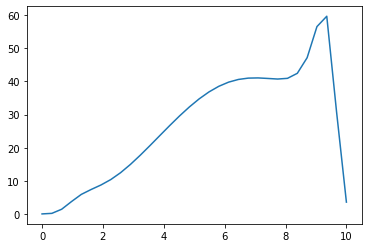

15488 1.6982557773590088


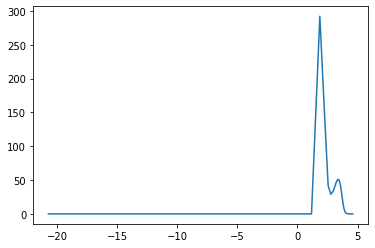

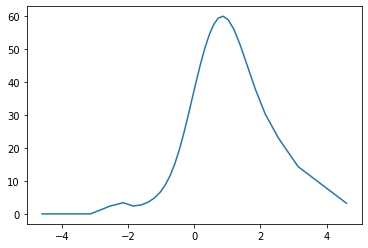

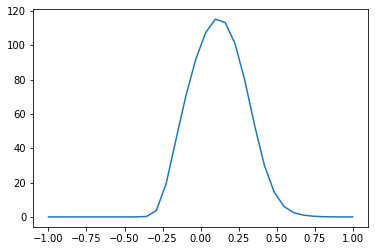

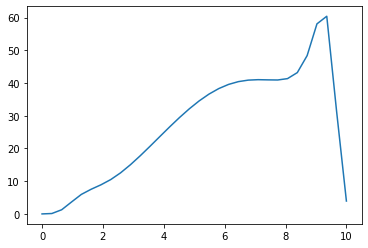

15616 1.7256220579147339


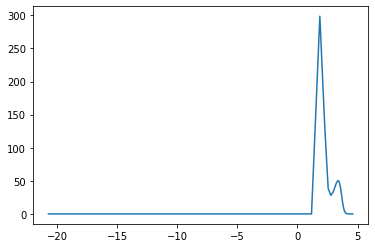

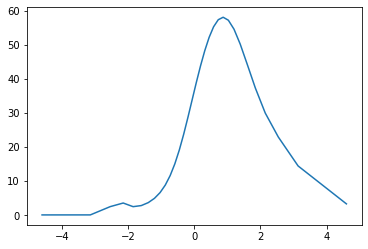

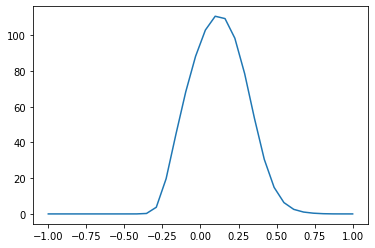

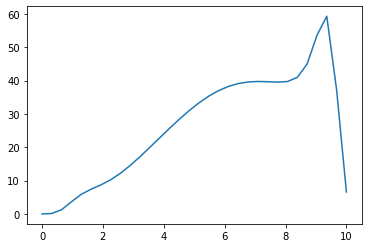

15744 1.7036877870559692


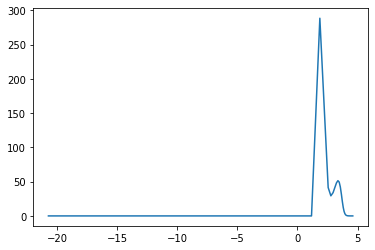

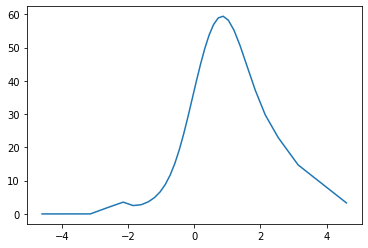

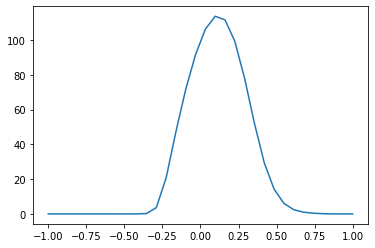

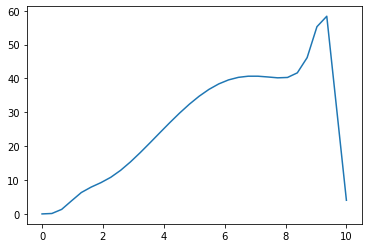

15872 1.729085922241211


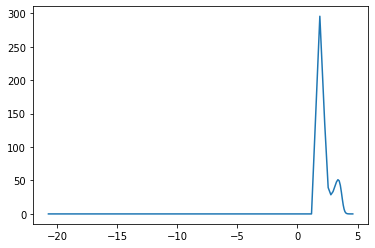

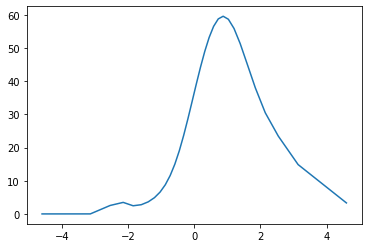

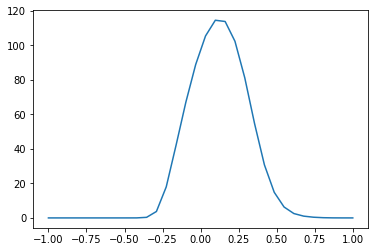

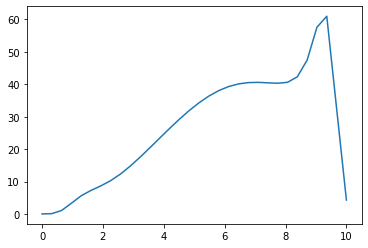

16000 1.7175753116607666


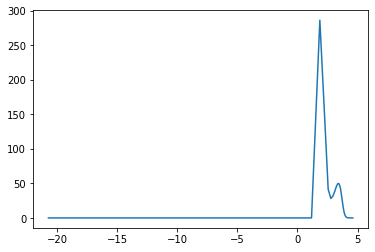

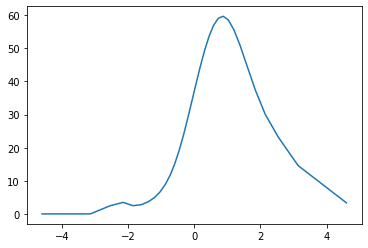

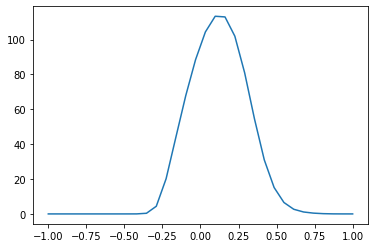

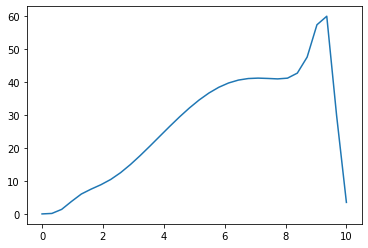

16128 1.7099031209945679


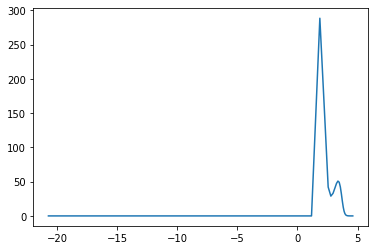

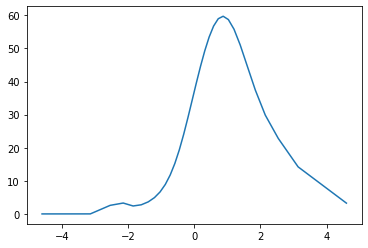

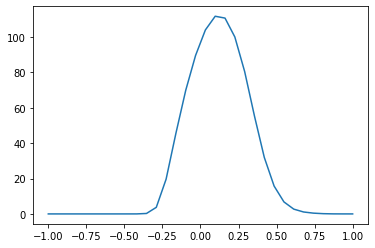

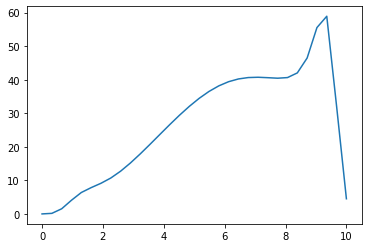

16256 1.7097994089126587


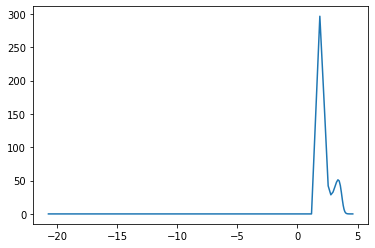

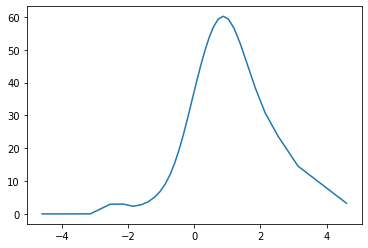

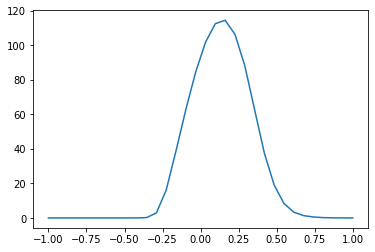

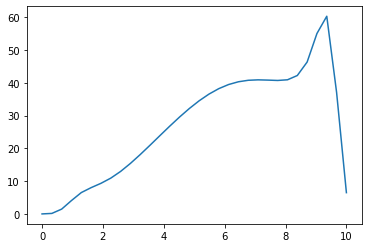

In [11]:
steps = 16384

for step in range(steps):
    optimizer.zero_grad()
    theta_batch = theta_samples.clone()[:, torch.randperm(1024)[:NUM_HIERARCHICAL_SAMPLES]]
    

    logprob = transformed_dist.log_prob(theta_batch.view(-1, DIM)).reshape(theta_batch.shape[:-1])
    
    logprob = torch.logsumexp(logprob, dim=-1)
    
    logprob = logprob.mean()
    loss = -logprob
    loss.backward()
    optimizer.step()
    
    for t in transformed_dist.transforms:
        t.clear_cache()
        
    if step % 128 == 0:
        print(step, loss.item())

        with torch.no_grad():
            prob = transformed_dist.log_prob(grid).exp().view(NX, NX, NX, NX)
            
            pm1 = prob.sum((1, 2, 3))
            plt.plot(grid_m1_, pm1)
            plt.show()
            
            
            pq = prob.sum((0, 2, 3))
            plt.plot(grid_q_, pq)
            plt.show()
            
            pX = prob.sum((0, 1, 3))
            plt.plot(grid_X_, pX)
            plt.show()


            pz = prob.sum((0, 1, 2))
            plt.plot(grid_z_, pz)
            plt.show()


In [12]:
del prob
prob = transformed_dist.log_prob(grid).exp().view(NX, NX, NX, NX)


In [13]:
inv = log_transform(grid_m1)
pm1 = prob.sum((1, 2, 3)).log() + log_transform.log_abs_det_jacobian(grid_m1, inv)


(-5.0, 5.0)

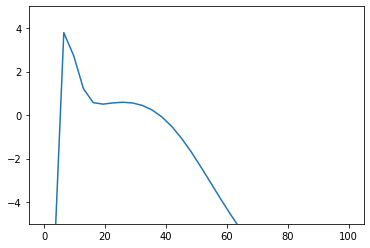

In [14]:
plt.plot(grid_m1, pm1.detach())
plt.ylim(-5, 5)

In [15]:
inv = logit_transform(grid_q)
pq = prob.sum((0, 2, 3)).log() + logit_transform.log_abs_det_jacobian(grid_q, inv)


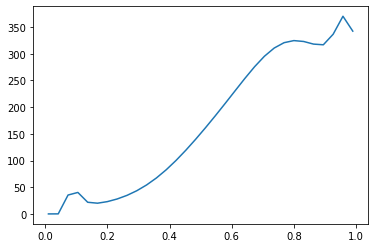

In [16]:
plt.plot(grid_q, pq.detach().exp())


In [17]:
# plt.plot(grid_q, prob.sum(0).detach())

In [18]:
pX = prob.sum((0, 1, 3)).log()

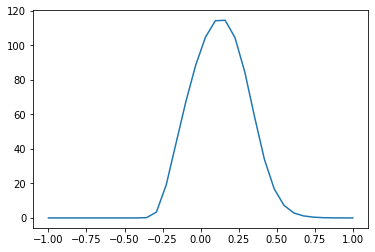

In [19]:
plt.plot(grid_X, pX.detach().exp())


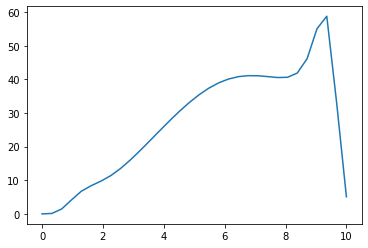

In [20]:
pz = prob.sum((0, 1, 2)).log()
plt.plot(grid_z, pz.detach().exp())


# Sample The Model

In [21]:
rng = (grid_m1_.min(), grid_m1_.max()), (grid_q_.min(), grid_q_.max()), (grid_X_.min(), grid_X_.max()), (grid_z_.min(), grid_z_.max())





In [22]:
torch.FloatTensor(rng)

tensor([[-20.7233,   4.6052],
        [ -4.5951,   4.5951],
        [ -1.0000,   1.0000],
        [  0.0000,  10.0000]])

In [23]:
@torch.no_grad()
def rejection_sampling(fn, rng, num_samples=1024, batch_size=32768, max_log_prob=0, n_dims=1):
    z = torch.Tensor()
    i = 0
    rng = torch.FloatTensor(rng)
    max = rng[:, 1]
    min = rng[:, 0]
    while len(z) < num_samples:
        eps = torch.rand((num_samples, n_dims))
        
        z_ = eps * (max - min) + min
        prob = torch.rand(num_samples)

        logprob = fn(z_).squeeze()
        assert not torch.any(logprob > max_log_prob), (logprob.max(), max_log_prob)
        prob_ = torch.exp(logprob - max_log_prob)
        
        accept = prob_ > prob
        z = torch.cat([z, z_[accept, :]])
        i += 1
        print(len(z))
    return z[:num_samples]

In [24]:
samples = rejection_sampling(transformed_dist.log_prob, rng, n_dims=4)

1
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
7
7
7
7
9
10
10
10
11
11
11
11
11
11
11
11
11
11
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
15
15
15
15
16
17
17
17
17
18
18
18
18
18
18
19
20
21
21
21
21
21
21
21
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
26
26
26
27
27
27
27
27
27
28
28
28
28
29
29
29
29
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
35
35
35
35
35
36
36
36
36
36
36
36
37
38
39
40
40
40
40
40
40
41
41
42
44
45
46
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
48
48
48
48
49
49
49
49
49
49
49
49
49
49
49
49
49
49
50
50
50
50
50
50
50
50
50
50
50
51
51
51
52
52
52
52
52
52
53
53
53
53
54
54
54
54
54
54
55
55
55
55
55
56
56
56
56
56
56
57
57
57
57
58
58
58
60
60
60
60
60
61
61
61
63
63
63
63
63
63
63
63
65
65
65
65
65
66
66
66
66
66
66
66
66
66
66
66
66
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
68
6

<AxesSubplot:ylabel='Density'>

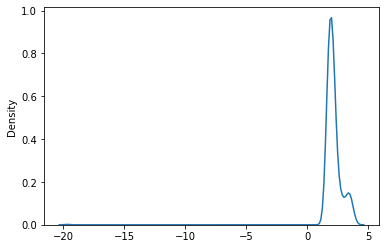

In [25]:
sns.kdeplot(samples[:, 0])

<AxesSubplot:ylabel='Density'>

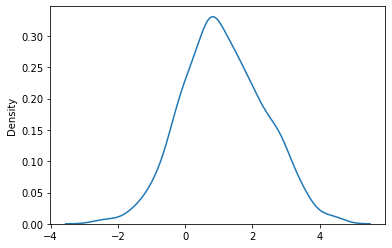

In [26]:
sns.kdeplot(samples[:, 1])

<AxesSubplot:ylabel='Density'>

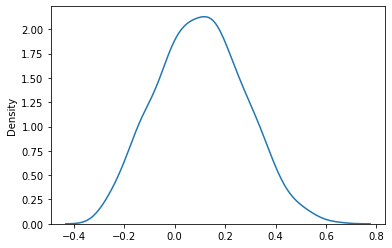

In [27]:
sns.kdeplot(samples[:, 2])

<AxesSubplot:ylabel='Density'>

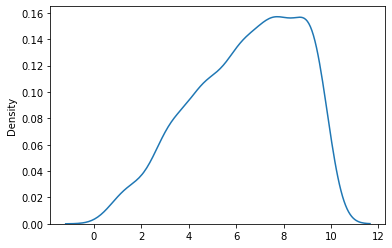

In [28]:
sns.kdeplot(samples[:, 3])

In [29]:
samples[:, 0] = exp_transform(samples[:, 0])
samples[:, 1] = sigmoid_transform(samples[:, 1])

<AxesSubplot:ylabel='Density'>

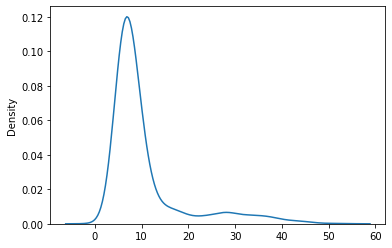

In [30]:
sns.kdeplot(samples[:, 0])

<AxesSubplot:ylabel='Density'>

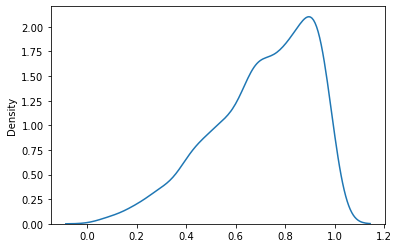

In [31]:
sns.kdeplot(samples[:, 1])

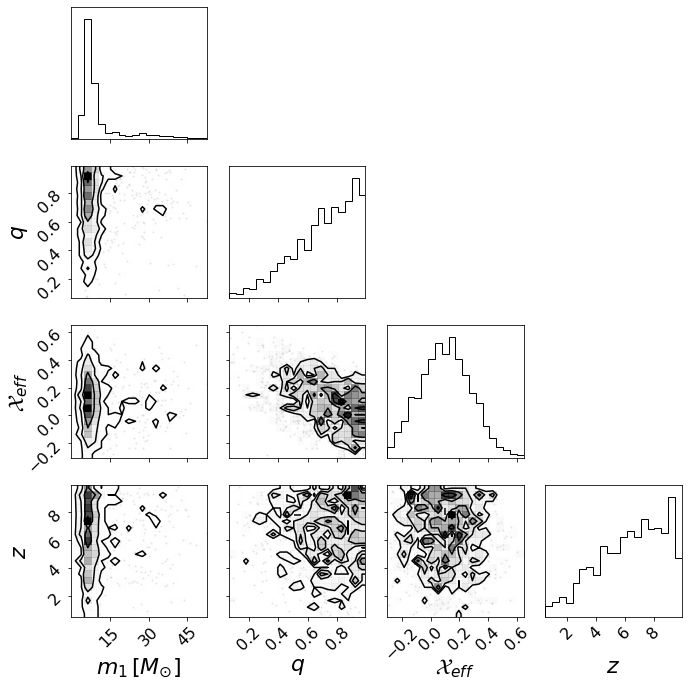

In [32]:
import corner
fig = corner.corner(samples.numpy(), labels=[r"$m_1\, [M_{\odot}]$", r"$q$", r"$\mathcal{X}_{eff}$", r"$z$"], label_kwargs=dict(fontsize=22))

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=16)
plt.tight_layout()

# fig.subplots_adjust(right=1.5,top=1.5)
plt.savefig('corner.pdf', bbox_inches='tight')



